In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob
import tensorflow as tf
import matplotlib.gridspec as gridspec
from torchvision import datasets, transforms

In [2]:
import sys
sys.path.append('../')
from data import get_loaders

In [3]:
%load_ext autoreload
%autoreload 1

In [6]:
def plot_clusters(run_name, seed=123):
    fig_name = 'figs_gluster/%s.png' % run_name
    data = torch.load('figs_gluster/%s.pth.tar' % run_name)
    assign_i, target_i, pred_i, loss_i, normC = data['assign'], data['target'], data['pred'], data['loss'], data['normC']
    pad = 2
    nsamples = 20
    np.random.seed(seed)

    train_dataset = datasets.MNIST(
            '../data/mnist', train=True, download=True,
            transform=transforms.Compose([
                transforms.ToTensor()
            ]))

    _, counts = np.unique(assign_i, return_counts=True)

    nclusters = len(counts)
    height = nclusters
    width = nsamples
    plt.figure(figsize=(7 * width, 4 * height))
    plt.tight_layout(pad=1., w_pad=3., h_pad=3.0)
    
    hpad = 28+2*pad
    images = np.zeros((nclusters, nsamples, 3, hpad, hpad))
    print('Train loss: %.4f' % (loss_i.mean()))
    print('Train accuracy: %.2f%%\n' % (((target_i==pred_i)*100.).mean()))
    for i in range(nclusters):
        idx, _ = np.where(assign_i==i)
        print('Cluster %d, size: %d' % (i, len(idx)))
        print('Cluster %d, normC: %.8f' % (i, normC[i]))
        print('Cluster %d, loss: %.4f' % (i, loss_i[idx].mean()))
        print('Cluster %d, accuracy: %.2f%%\n' % (i, ((target_i[idx]==pred_i[idx])*100.).mean()))
        np.random.shuffle(idx)
        for j in range(nsamples):
            xi = train_dataset[idx[j]][0]
            xi2 = np.zeros((3, hpad, hpad))
            xi2[0] = (pred_i[idx[j]]!=target_i[idx[j]])
            xi2[0:1, pad:28+pad, pad:28+pad] = xi
            xi2[1:2, pad:28+pad, pad:28+pad] = xi
            xi2[2:3, pad:28+pad, pad:28+pad] = xi
            images[i, j] = xi2

    xi = vutils.make_grid(torch.tensor(images.reshape(-1, 3, hpad, hpad)), nrow=nsamples, normalize=True, scale_each=True)

    plt.imshow(xi.numpy().transpose([1,2,0]))
    plt.axis('off')
    plt.savefig(fig_name, dpi=100, bbox_inches='tight')

# Few iters

Train loss: 0.1019
Train accuracy: 97.18%

Cluster 0, size: 50082
Cluster 0, normC: 0.00242573
Cluster 0, loss: 0.0609
Cluster 0, accuracy: 98.45%

Cluster 1, size: 9918
Cluster 1, normC: 0.01595137
Cluster 1, loss: 0.3088
Cluster 1, accuracy: 90.77%



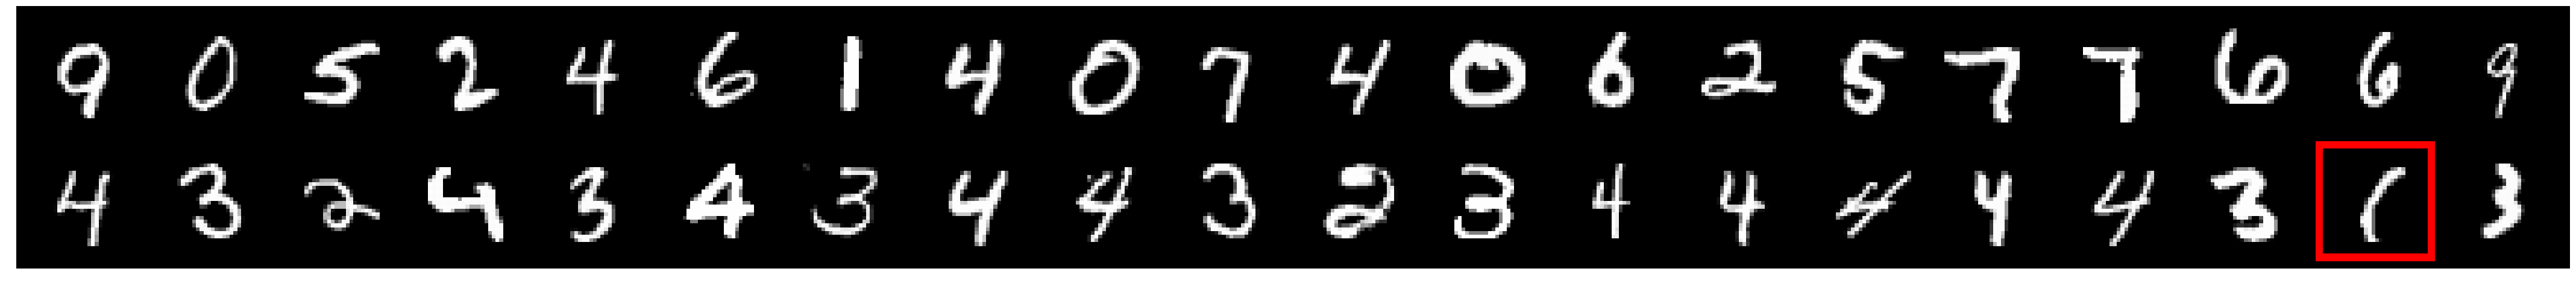

In [8]:
run_name='mlp,nclusters_2,citers_2'
plot_clusters(run_name)

# 2 Clusters enough iters

Train loss: 0.0979
Train accuracy: 97.32%

Cluster 0, size: 58948
Cluster 0, normC: 0.00134917
Cluster 0, loss: 0.0749
Cluster 0, accuracy: 98.24%

Cluster 1, size: 1052
Cluster 1, normC: 0.09175745
Cluster 1, loss: 1.3838
Cluster 1, accuracy: 45.82%



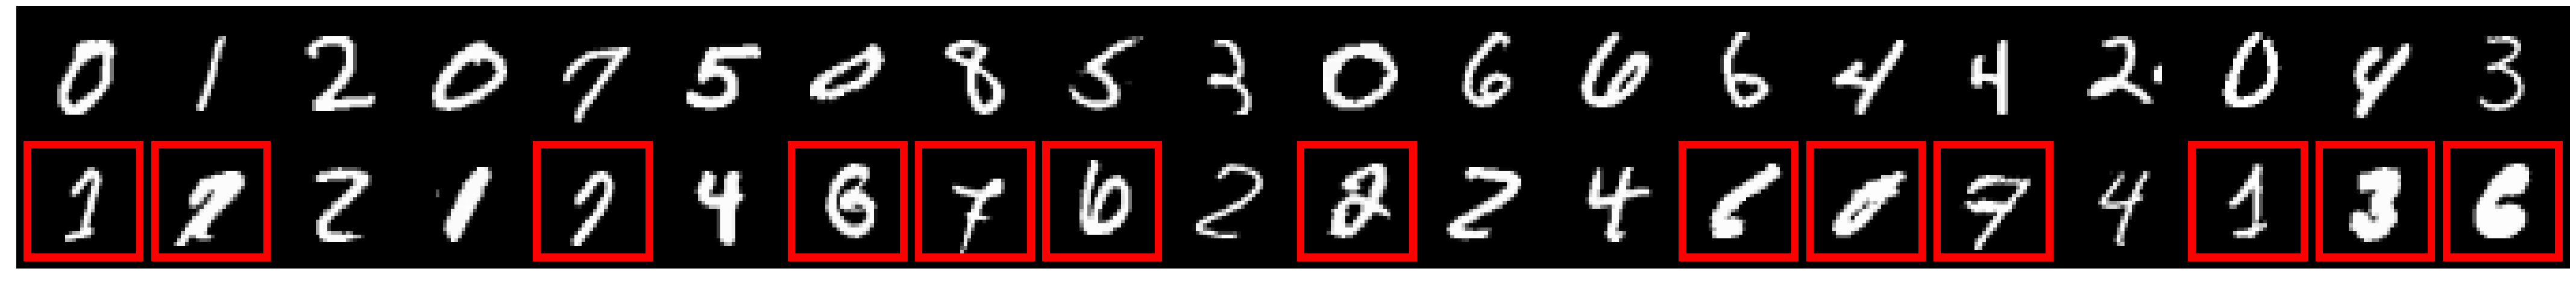

In [10]:
run_name='mlp,nclusters_2,citers_10'
plot_clusters(run_name)

# 10 Clusters

Train loss: 0.0979
Train accuracy: 97.21%

Cluster 0, size: 513
Cluster 0, normC: 0.14360966
Cluster 0, loss: 1.5311
Cluster 0, accuracy: 35.67%

Cluster 1, size: 386
Cluster 1, normC: 0.10603758
Cluster 1, loss: 1.3514
Cluster 1, accuracy: 49.22%

Cluster 2, size: 552
Cluster 2, normC: 0.13843486
Cluster 2, loss: 1.3996
Cluster 2, accuracy: 42.93%

Cluster 3, size: 245
Cluster 3, normC: 0.14752984
Cluster 3, loss: 1.4476
Cluster 3, accuracy: 37.14%

Cluster 4, size: 933
Cluster 4, normC: 0.04617711
Cluster 4, loss: 0.5602
Cluster 4, accuracy: 86.60%

Cluster 5, size: 494
Cluster 5, normC: 0.11411212
Cluster 5, loss: 1.3118
Cluster 5, accuracy: 51.82%

Cluster 6, size: 352
Cluster 6, normC: 0.09627378
Cluster 6, loss: 0.9147
Cluster 6, accuracy: 69.60%

Cluster 7, size: 877
Cluster 7, normC: 0.04272161
Cluster 7, loss: 0.6285
Cluster 7, accuracy: 85.75%

Cluster 8, size: 53875
Cluster 8, normC: 0.00056636
Cluster 8, loss: 0.0169
Cluster 8, accuracy: 99.99%

Cluster 9, size: 1773
Cluste

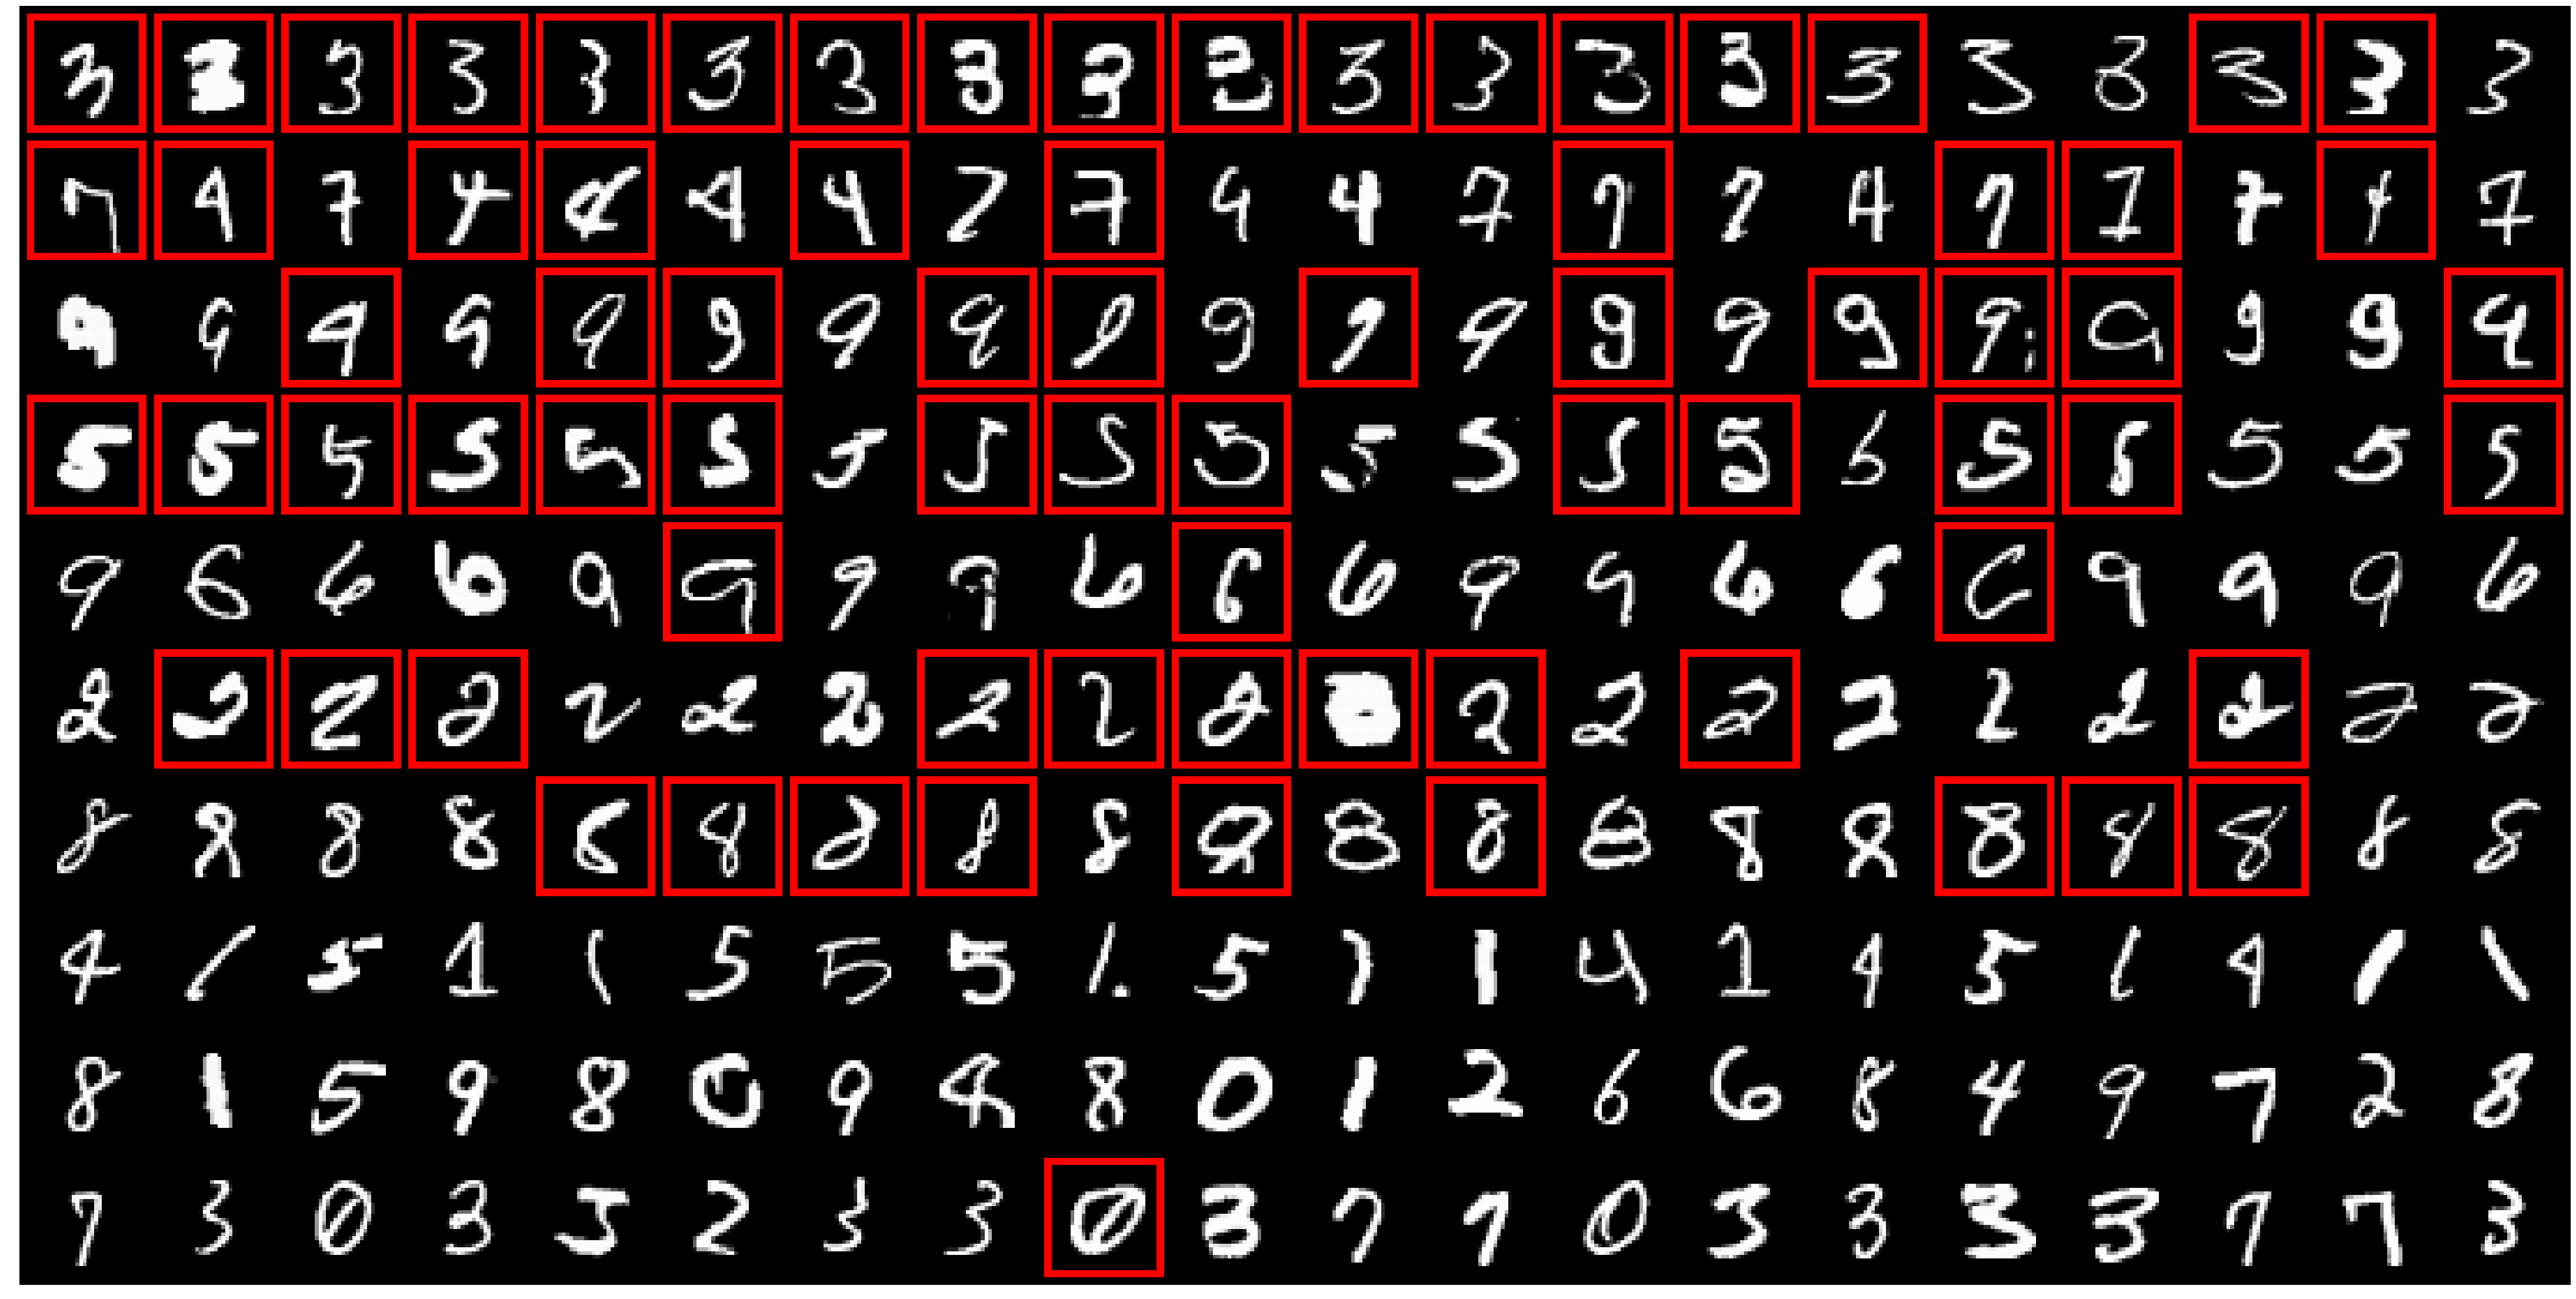

In [21]:
run_name='mlp,nclusters_10,citers_10'
plot_clusters(run_name)

## Different seed

Train loss: 0.0972
Train accuracy: 97.35%

Cluster 0, size: 373
Cluster 0, normC: 0.13776322
Cluster 0, loss: 1.1570
Cluster 0, accuracy: 55.76%

Cluster 1, size: 323
Cluster 1, normC: 0.14177364
Cluster 1, loss: 1.5769
Cluster 1, accuracy: 31.27%

Cluster 2, size: 408
Cluster 2, normC: 0.12218568
Cluster 2, loss: 1.3065
Cluster 2, accuracy: 50.98%

Cluster 3, size: 820
Cluster 3, normC: 0.07198437
Cluster 3, loss: 1.1669
Cluster 3, accuracy: 57.32%

Cluster 4, size: 589
Cluster 4, normC: 0.08575339
Cluster 4, loss: 1.1684
Cluster 4, accuracy: 59.76%

Cluster 5, size: 440
Cluster 5, normC: 0.10538045
Cluster 5, loss: 0.9742
Cluster 5, accuracy: 67.05%

Cluster 6, size: 286
Cluster 6, normC: 0.14626762
Cluster 6, loss: 1.4385
Cluster 6, accuracy: 42.66%

Cluster 7, size: 1222
Cluster 7, normC: 0.02679893
Cluster 7, loss: 0.3622
Cluster 7, accuracy: 93.21%

Cluster 8, size: 713
Cluster 8, normC: 0.03999298
Cluster 8, loss: 0.2623
Cluster 8, accuracy: 98.74%

Cluster 9, size: 54826
Cluste

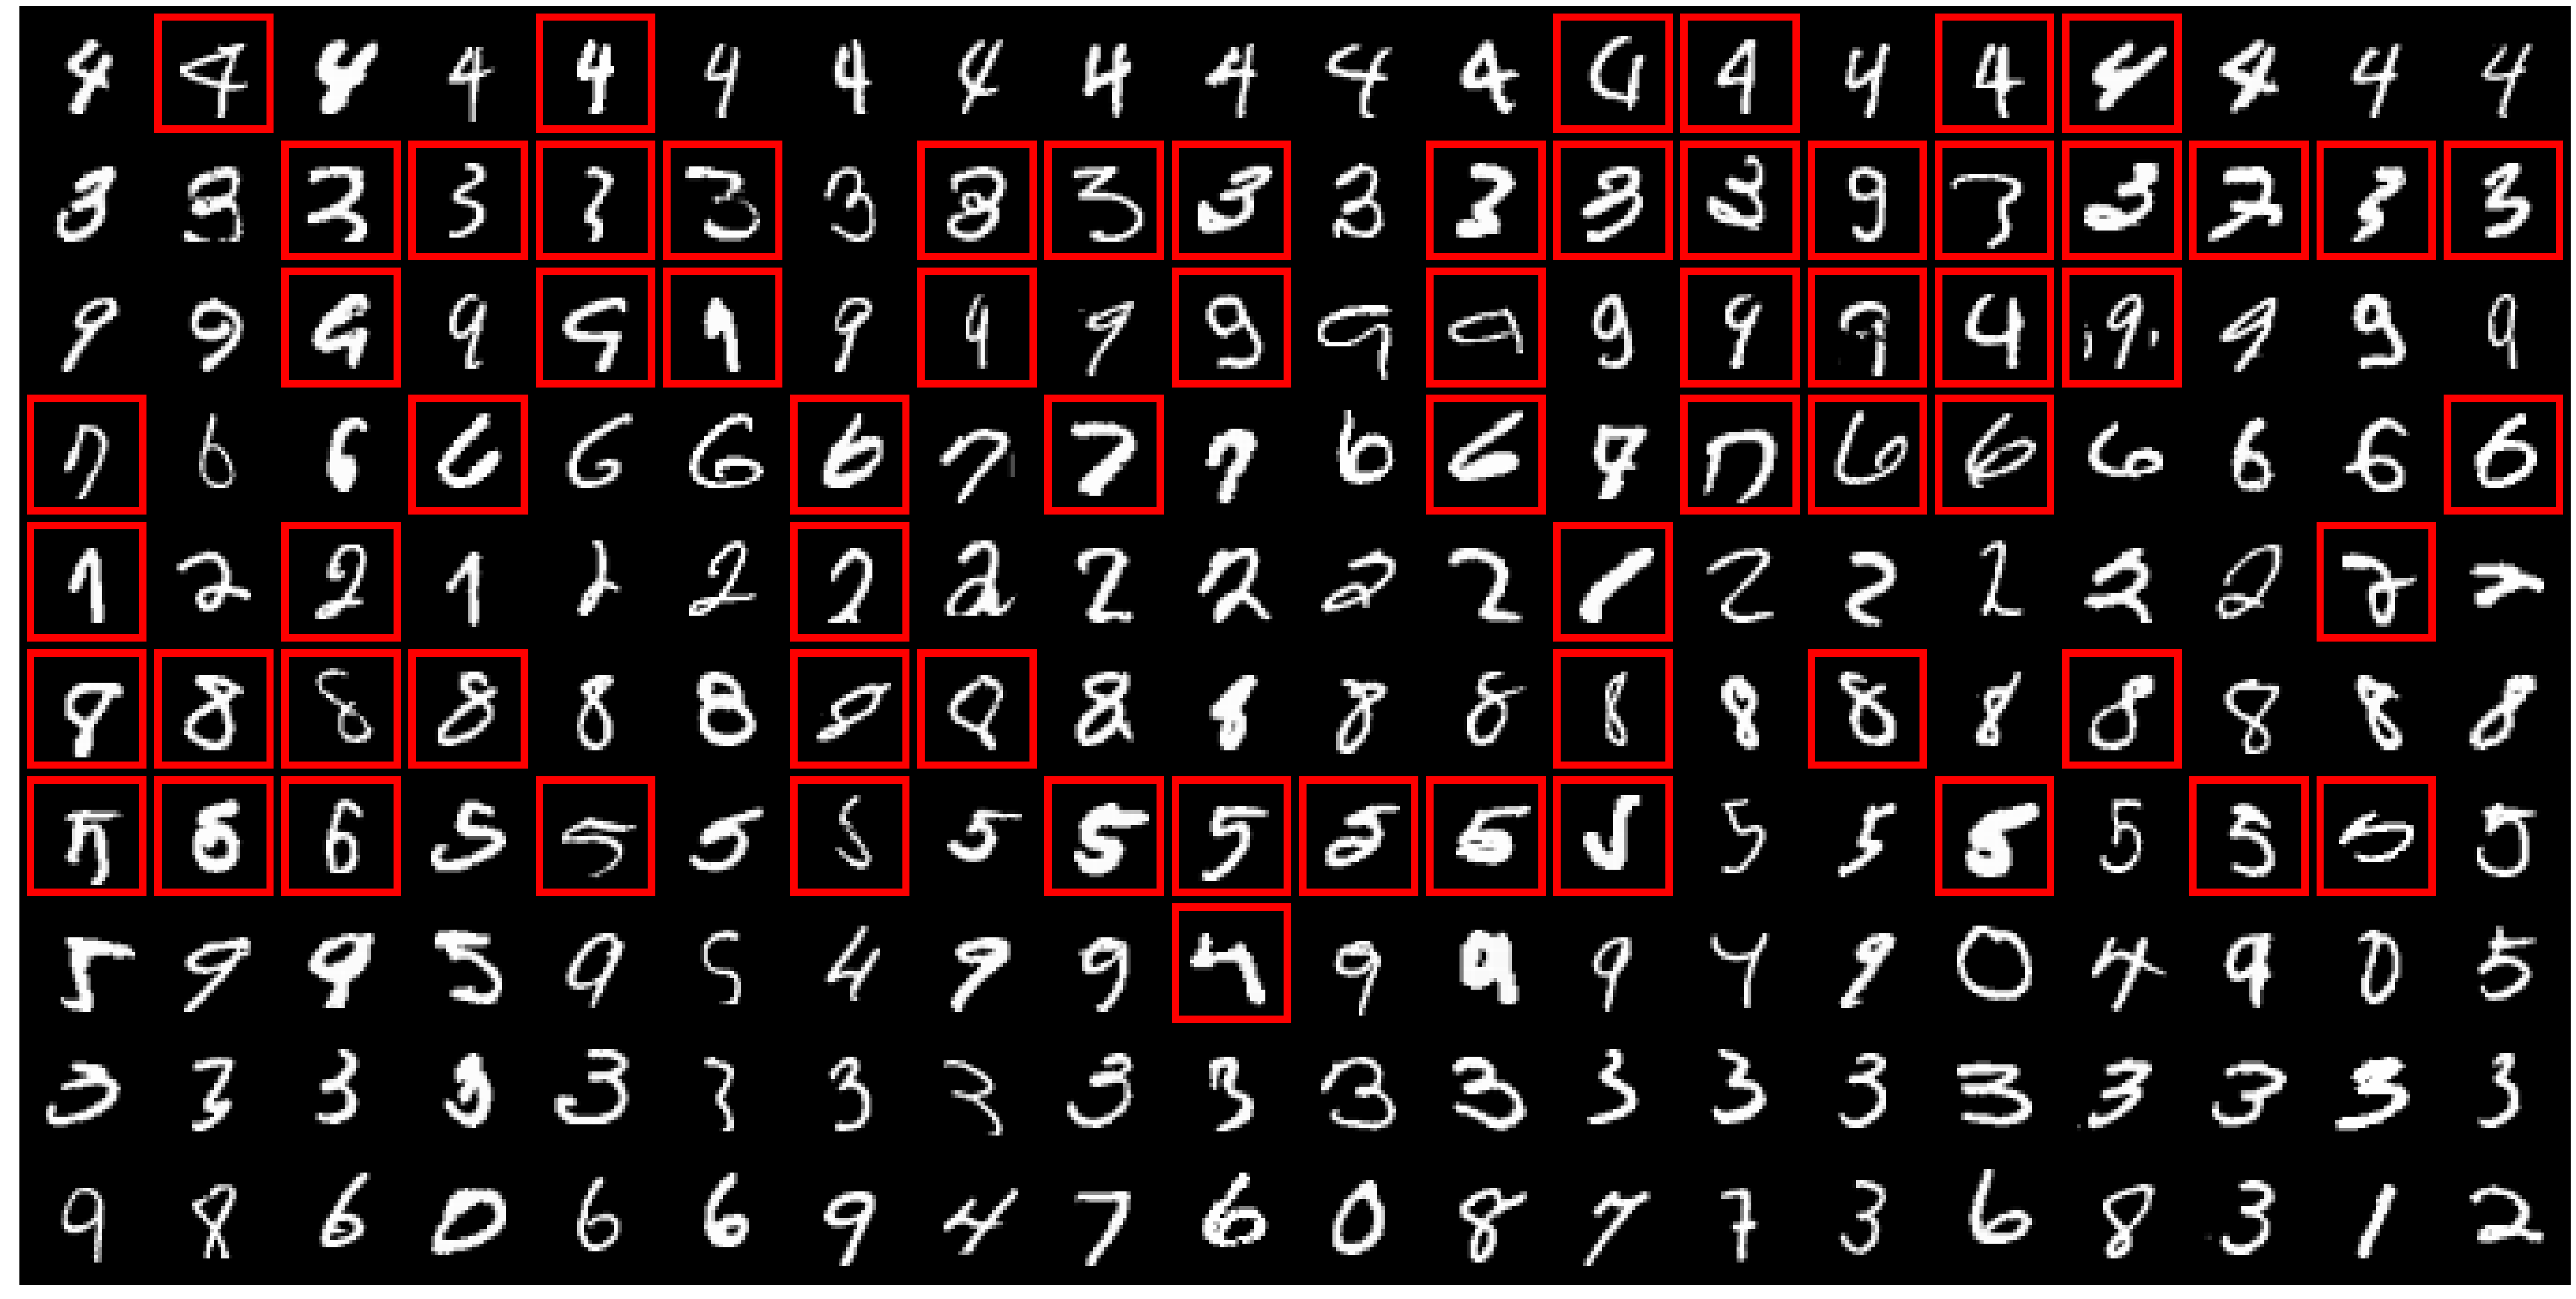

In [11]:
run_name='mlp,nclusters_10,citers_10'
plot_clusters(run_name)

* There is a pure cluster with 90% data low normC and ~100%
* Each other cluster found similar errors, e.g. 3 vs 8, 5 vs 6, 9 vs 7, and so on.
* When nclusters=2, the normC for bigger cluster is smaller when citers=10 vs citers=2 but average loss is bigger. why?
* **Random seed affects the types of error the model makes**

# Online

Train loss: 0.1344
Train accuracy: 96.08%

Cluster 0, size: 1873
Cluster 0, normC: 0.04252810
Cluster 0, loss: 0.9118
Cluster 0, accuracy: 68.87%

Cluster 1, size: 956
Cluster 1, normC: 0.06136152
Cluster 1, loss: 1.2437
Cluster 1, accuracy: 58.16%

Cluster 2, size: 206
Cluster 2, normC: 0.10329871
Cluster 2, loss: 1.9973
Cluster 2, accuracy: 38.35%

Cluster 3, size: 141
Cluster 3, normC: 0.13656595
Cluster 3, loss: 1.8972
Cluster 3, accuracy: 27.66%

Cluster 4, size: 457
Cluster 4, normC: 0.04645481
Cluster 4, loss: 0.8131
Cluster 4, accuracy: 75.93%

Cluster 5, size: 545
Cluster 5, normC: 0.02417802
Cluster 5, loss: 0.3097
Cluster 5, accuracy: 93.76%

Cluster 6, size: 548
Cluster 6, normC: 0.09896148
Cluster 6, loss: 1.2749
Cluster 6, accuracy: 54.93%

Cluster 7, size: 632
Cluster 7, normC: 0.12340216
Cluster 7, loss: 1.3278
Cluster 7, accuracy: 46.20%

Cluster 8, size: 561
Cluster 8, normC: 0.13269600
Cluster 8, loss: 1.6288
Cluster 8, accuracy: 37.61%

Cluster 9, size: 54081
Cluste

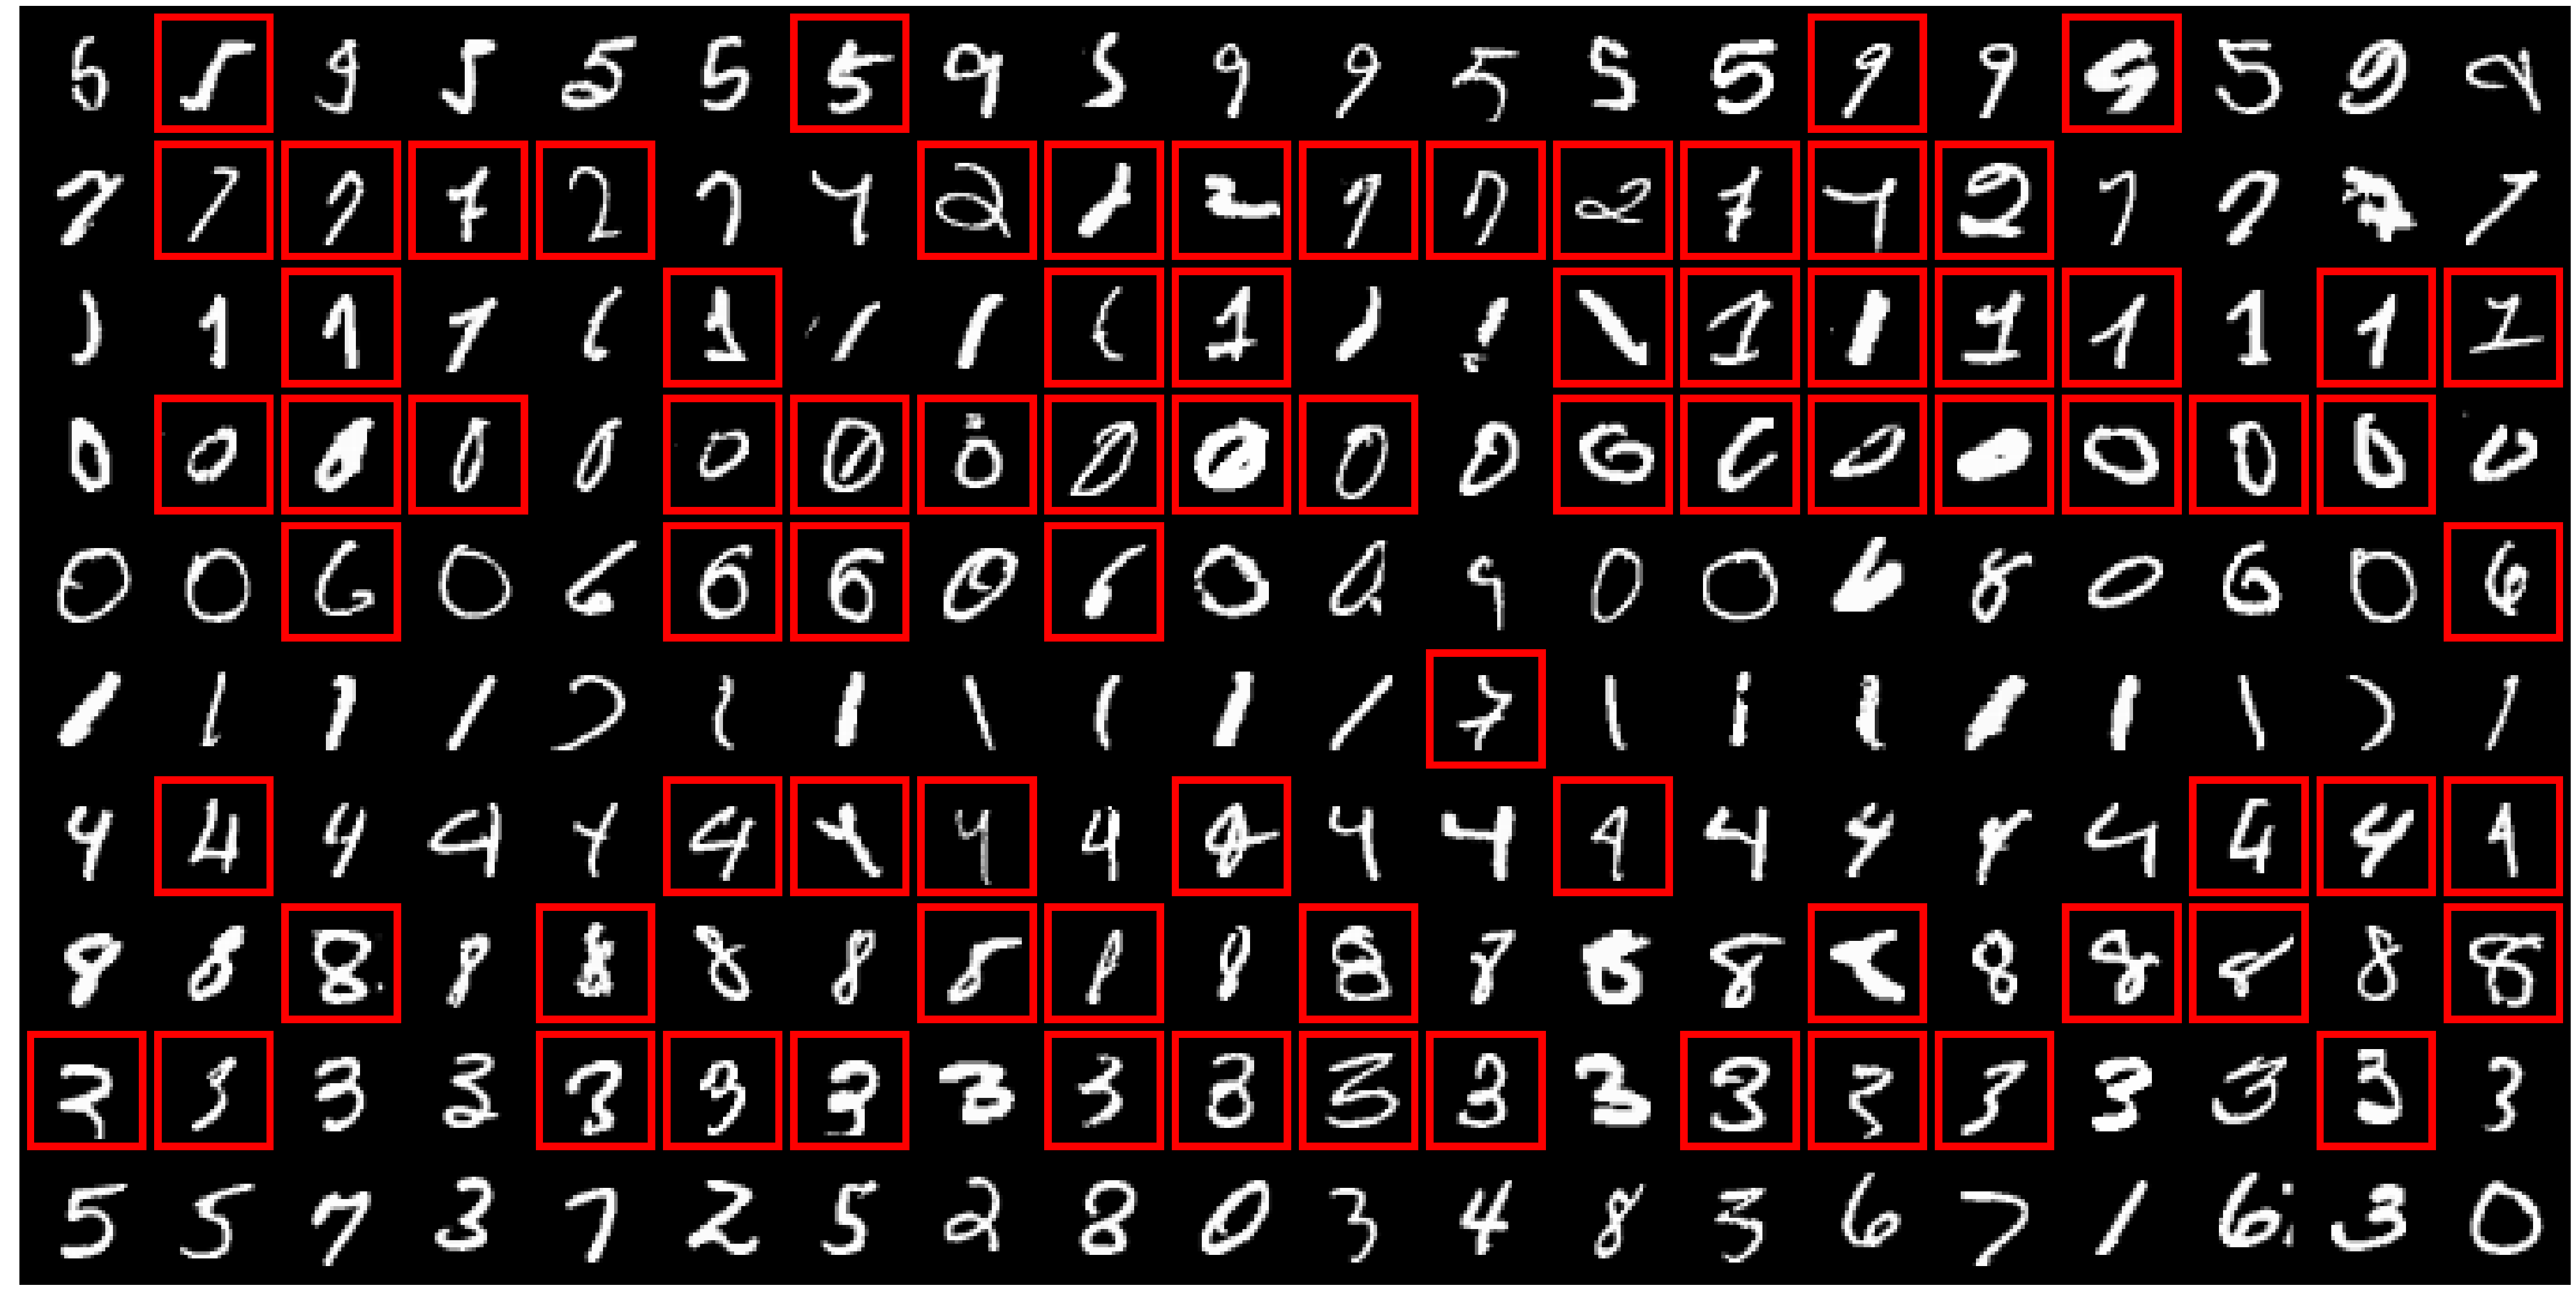

In [22]:
run_name='mlp,nclusters_10,online'
plot_clusters(run_name)

# Delayed

Train loss: 0.0981
Train accuracy: 97.19%

Cluster 0, size: 1191
Cluster 0, normC: 0.03259823
Cluster 0, loss: 0.8160
Cluster 0, accuracy: 74.64%

Cluster 1, size: 349
Cluster 1, normC: 0.02651952
Cluster 1, loss: 0.2172
Cluster 1, accuracy: 98.85%

Cluster 2, size: 537
Cluster 2, normC: 0.07800493
Cluster 2, loss: 1.0429
Cluster 2, accuracy: 63.87%

Cluster 3, size: 846
Cluster 3, normC: 0.07631786
Cluster 3, loss: 0.9425
Cluster 3, accuracy: 65.84%

Cluster 4, size: 55430
Cluster 4, normC: 0.00208678
Cluster 4, loss: 0.0296
Cluster 4, accuracy: 99.59%

Cluster 5, size: 150
Cluster 5, normC: 0.14279228
Cluster 5, loss: 1.8138
Cluster 5, accuracy: 23.33%

Cluster 6, size: 187
Cluster 6, normC: 0.12438696
Cluster 6, loss: 1.7150
Cluster 6, accuracy: 41.71%

Cluster 7, size: 249
Cluster 7, normC: 0.06830276
Cluster 7, loss: 1.0271
Cluster 7, accuracy: 60.24%

Cluster 8, size: 446
Cluster 8, normC: 0.09159139
Cluster 8, loss: 1.3456
Cluster 8, accuracy: 48.21%

Cluster 9, size: 615
Cluste

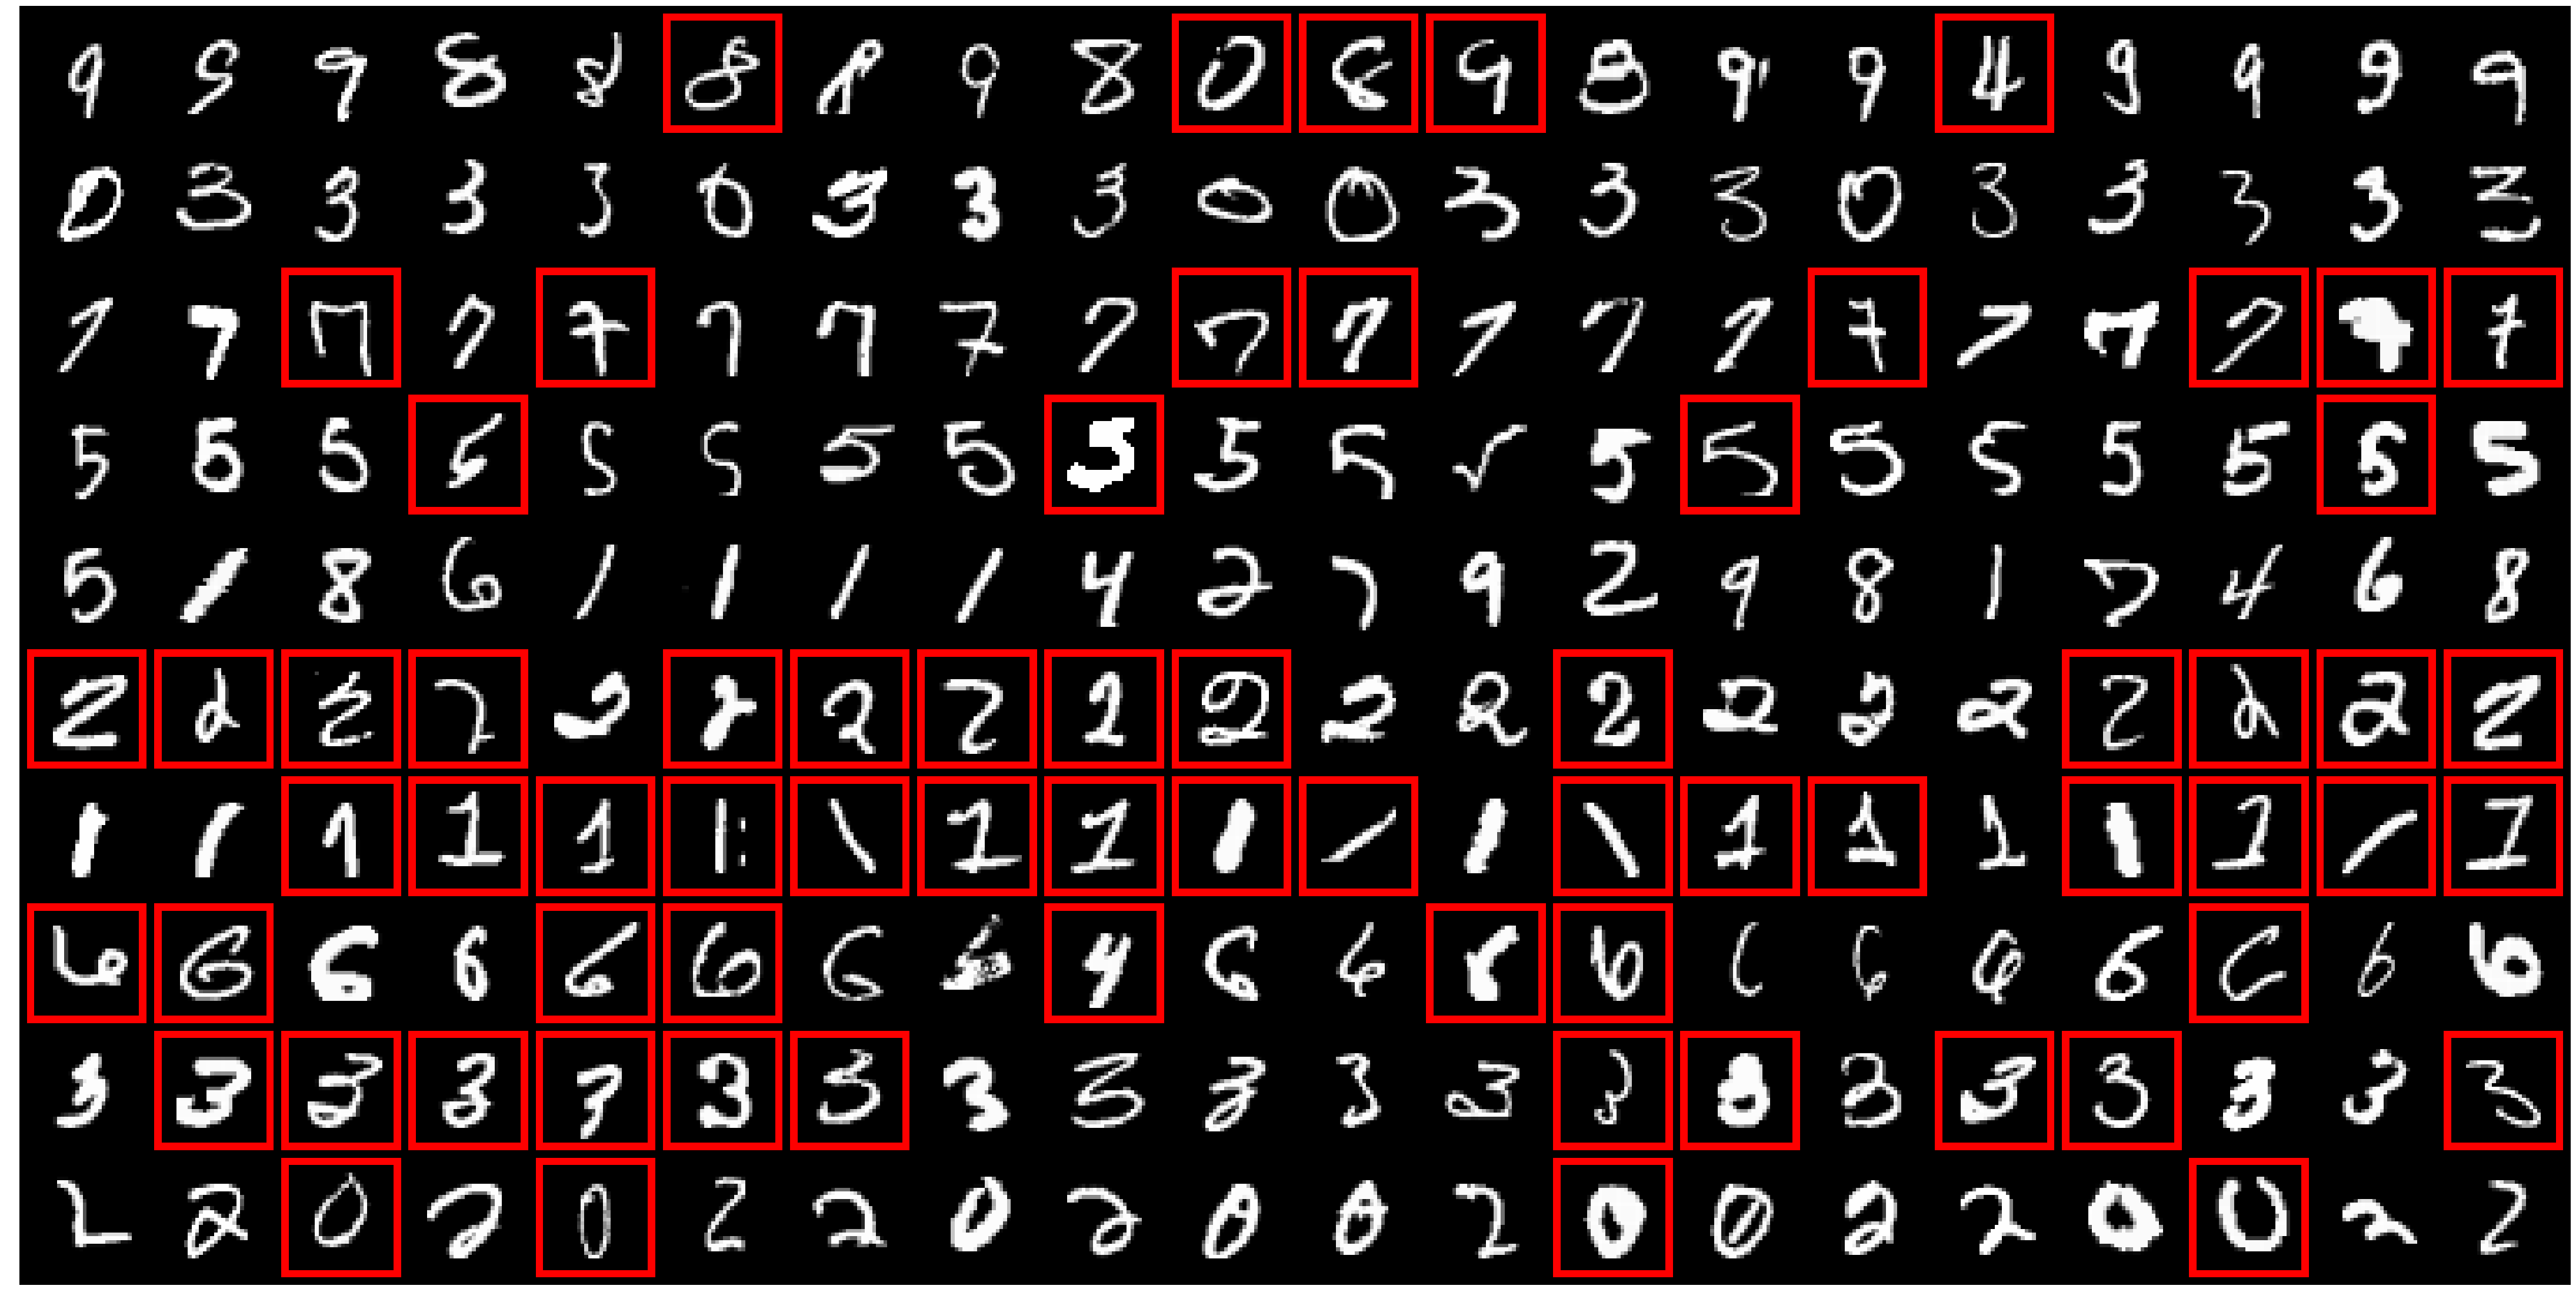

In [13]:
run_name='mlp,nclusters_10,online,delay_10'
plot_clusters(run_name)

```
delay=1
[ 1804   712   188   217   168   523   387   379   346 55276]
Train time: 2.4859s
Gluster update time: 7.3698s
Gluster eval time: 2.7306s

delay=10
[  785   547  1276   551 52896   185   728  2367   235   430]
Train time: 2.2952s
Gluster update time: 0.7058s
Gluster eval time: 2.7172s

delay=100
[ 4441  1908   952  1993  1125   856 48428   297]
Train time: 2.6227s
Gluster update time: 0.1634s
Gluster eval time: 2.8893s
```
3 times slower than a normal backprop

One backprop with gluster update takes ~3x more time than a normal backprop. I tried 10 and 100 delayed updates for 2 epochs training of an MLE on MNIST. Delay=1 finds one clean cluster of 55K, delay=10 finds one with 52K and delay=100 finds one with 48K. Notice that in 2 epochs delay=100, only runs the gluster about 8 times. Seems like the cost of finding the cluster centers can be amortized easily.

There is another cost that is computing the assignments which we'd better do more often. That cost is much less ~1.2x the cost of a normal backprop.

We need to check whether these timings match the complexity analysis on the paper.

# Input

Train loss: 0.0990
Train accuracy: 97.23%

Cluster 0, size: 4782
Cluster 0, normC: 0.00554944
Cluster 0, loss: 0.0939
Cluster 0, accuracy: 96.76%

Cluster 1, size: 6624
Cluster 1, normC: 0.00446664
Cluster 1, loss: 0.0812
Cluster 1, accuracy: 97.61%

Cluster 2, size: 7118
Cluster 2, normC: 0.00412753
Cluster 2, loss: 0.0898
Cluster 2, accuracy: 97.68%

Cluster 3, size: 8078
Cluster 3, normC: 0.00484670
Cluster 3, loss: 0.0796
Cluster 3, accuracy: 97.72%

Cluster 4, size: 7167
Cluster 4, normC: 0.00360136
Cluster 4, loss: 0.1779
Cluster 4, accuracy: 94.87%

Cluster 5, size: 6254
Cluster 5, normC: 0.00416798
Cluster 5, loss: 0.1388
Cluster 5, accuracy: 96.10%

Cluster 6, size: 6393
Cluster 6, normC: 0.00503754
Cluster 6, loss: 0.0731
Cluster 6, accuracy: 98.09%

Cluster 7, size: 4199
Cluster 7, normC: 0.00473027
Cluster 7, loss: 0.0929
Cluster 7, accuracy: 97.57%

Cluster 8, size: 6360
Cluster 8, normC: 0.00475562
Cluster 8, loss: 0.0813
Cluster 8, accuracy: 98.14%

Cluster 9, size: 3025

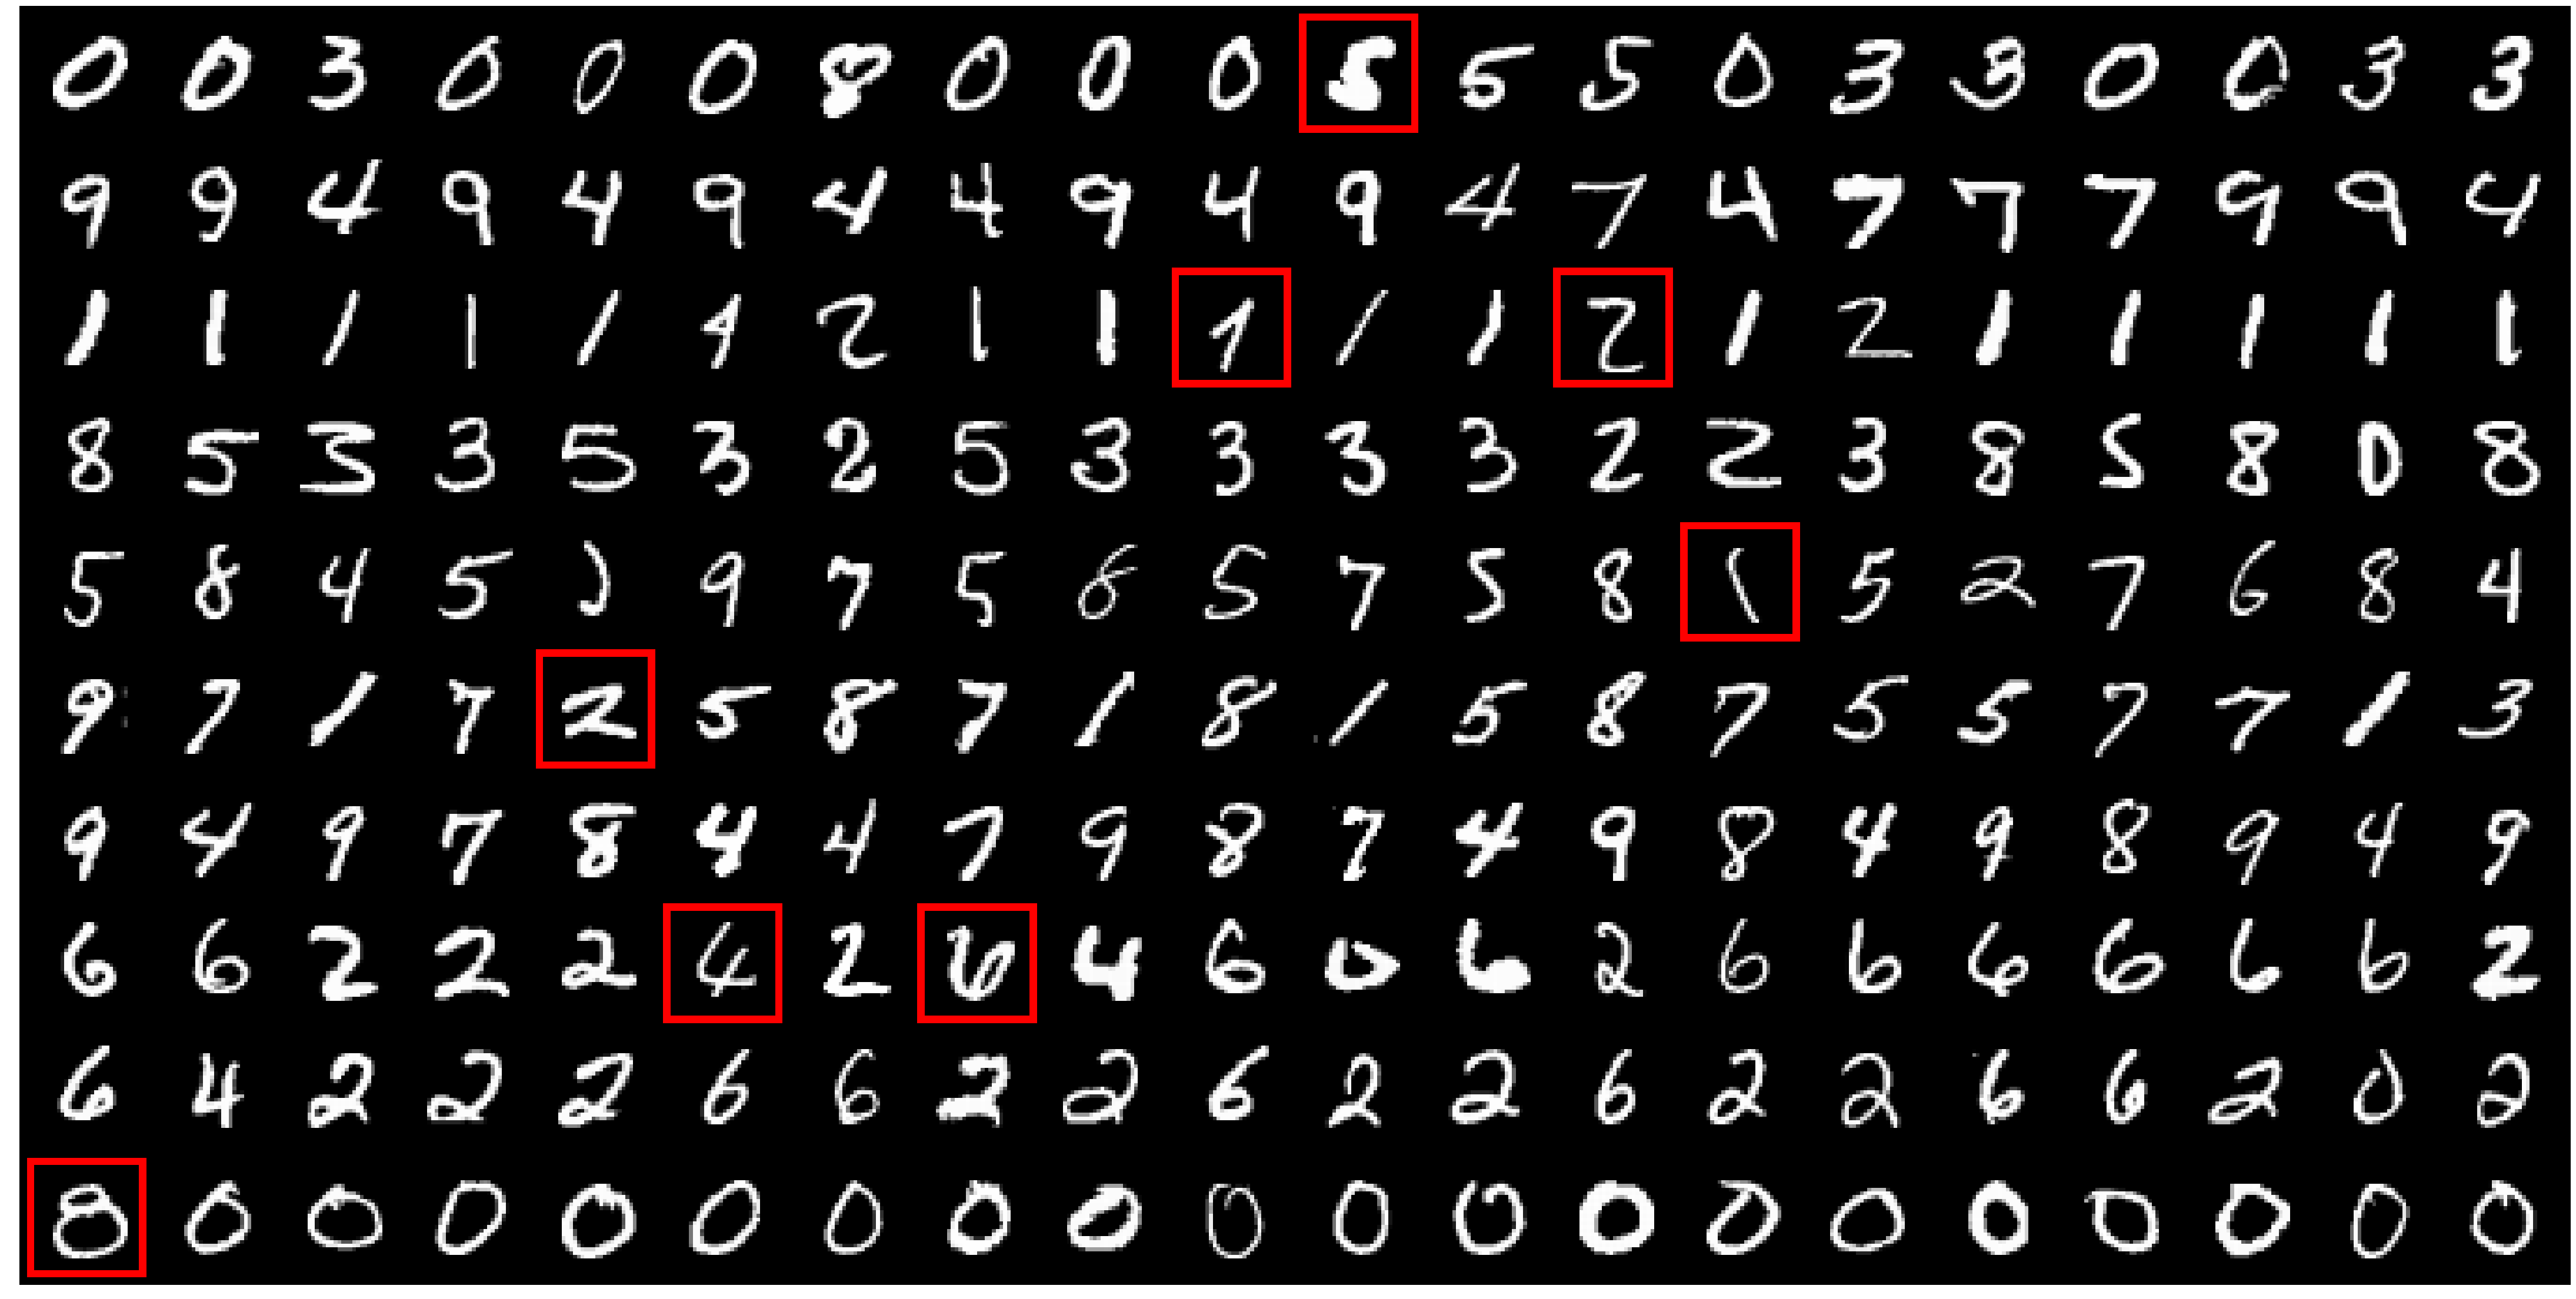

In [17]:
run_name='mlp,nclusters_10,input'
plot_clusters(run_name)

# Layer 1

Train loss: 0.0986
Train accuracy: 97.30%

Cluster 0, size: 317
Cluster 0, normC: 0.07764841
Cluster 0, loss: 1.3858
Cluster 0, accuracy: 47.00%

Cluster 1, size: 261
Cluster 1, normC: 0.10481887
Cluster 1, loss: 1.0283
Cluster 1, accuracy: 53.26%

Cluster 2, size: 293
Cluster 2, normC: 0.09303912
Cluster 2, loss: 1.6107
Cluster 2, accuracy: 35.15%

Cluster 3, size: 377
Cluster 3, normC: 0.07556219
Cluster 3, loss: 1.6372
Cluster 3, accuracy: 35.81%

Cluster 4, size: 201
Cluster 4, normC: 0.12057775
Cluster 4, loss: 1.8412
Cluster 4, accuracy: 26.37%

Cluster 5, size: 104
Cluster 5, normC: 0.09488885
Cluster 5, loss: 2.2504
Cluster 5, accuracy: 28.85%

Cluster 6, size: 662
Cluster 6, normC: 0.05305382
Cluster 6, loss: 1.0696
Cluster 6, accuracy: 60.42%

Cluster 7, size: 109
Cluster 7, normC: 0.16407388
Cluster 7, loss: 1.9589
Cluster 7, accuracy: 12.84%

Cluster 8, size: 463
Cluster 8, normC: 0.05321427
Cluster 8, loss: 0.7299
Cluster 8, accuracy: 77.97%

Cluster 9, size: 57213
Cluster

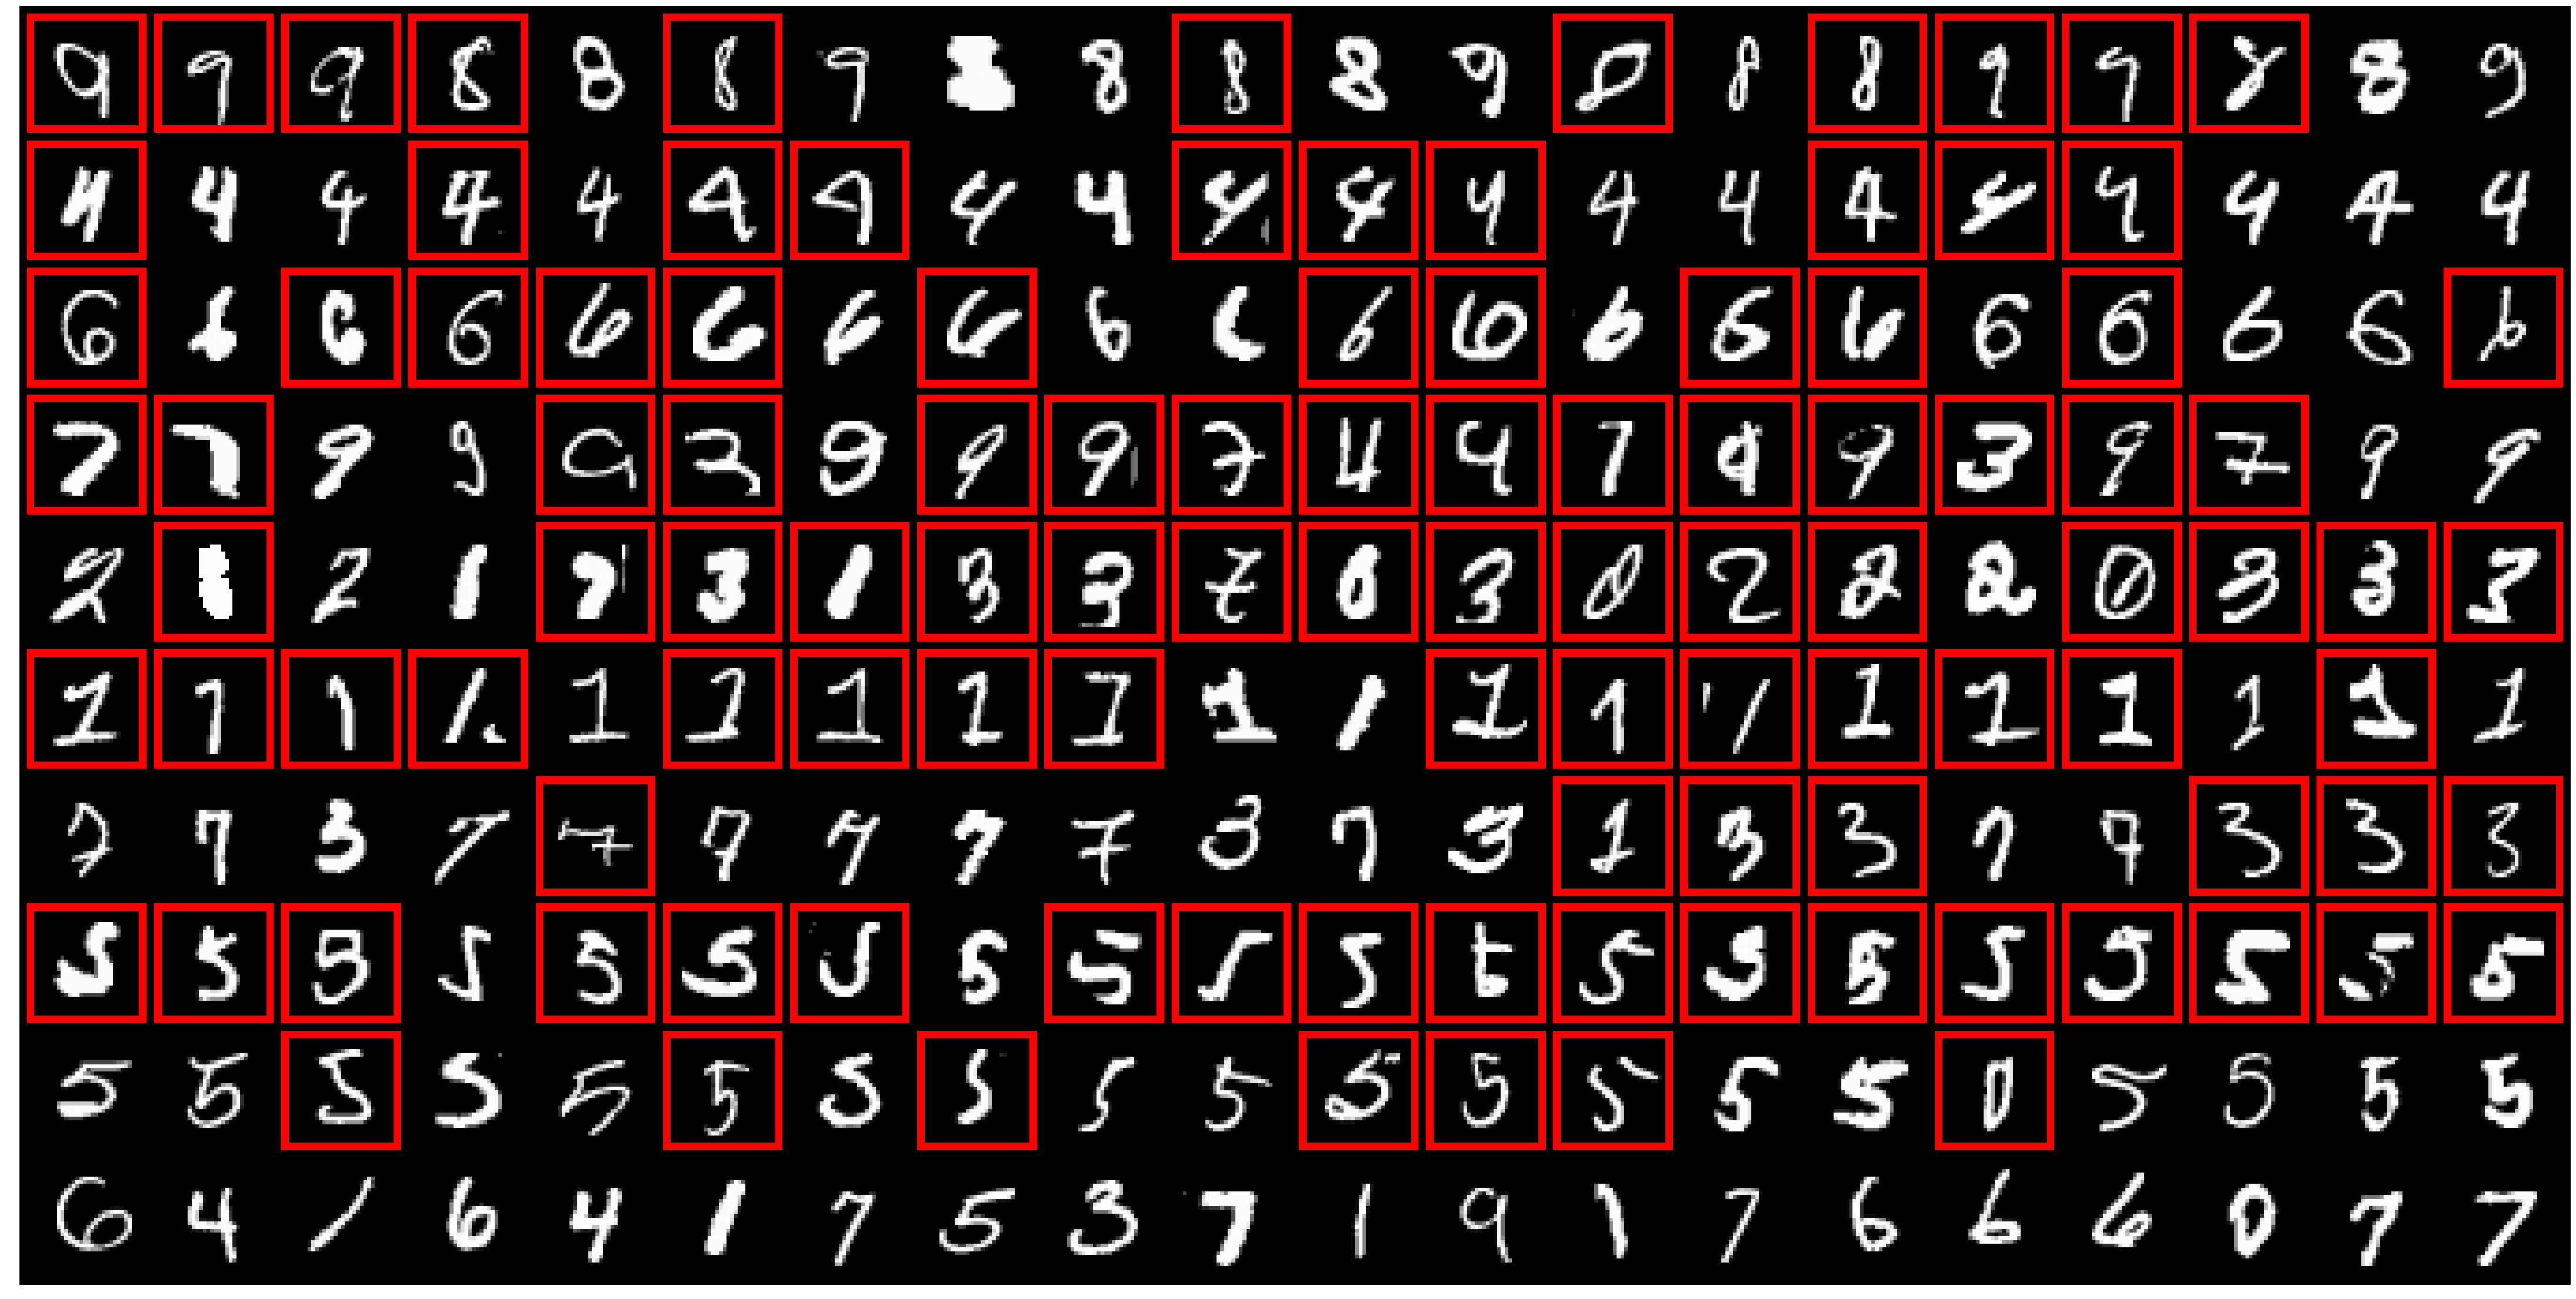

In [18]:
run_name='mlp,nclusters_10,layer_1'
plot_clusters(run_name)

# Layer 4 (3)

Train loss: 0.1011
Train accuracy: 97.19%

Cluster 0, size: 360
Cluster 0, normC: 0.06947843
Cluster 0, loss: 1.4243
Cluster 0, accuracy: 44.44%

Cluster 1, size: 298
Cluster 1, normC: 0.06189052
Cluster 1, loss: 1.1853
Cluster 1, accuracy: 55.70%

Cluster 2, size: 452
Cluster 2, normC: 0.07567072
Cluster 2, loss: 1.2338
Cluster 2, accuracy: 48.45%

Cluster 3, size: 426
Cluster 3, normC: 0.06340856
Cluster 3, loss: 1.2352
Cluster 3, accuracy: 53.76%

Cluster 4, size: 632
Cluster 4, normC: 0.05196143
Cluster 4, loss: 1.4326
Cluster 4, accuracy: 42.09%

Cluster 5, size: 709
Cluster 5, normC: 0.04657723
Cluster 5, loss: 1.2885
Cluster 5, accuracy: 55.01%

Cluster 6, size: 1924
Cluster 6, normC: 0.01042653
Cluster 6, loss: 0.2197
Cluster 6, accuracy: 98.23%

Cluster 7, size: 400
Cluster 7, normC: 0.05307915
Cluster 7, loss: 1.0180
Cluster 7, accuracy: 63.50%

Cluster 8, size: 52468
Cluster 8, normC: 0.00049108
Cluster 8, loss: 0.0184
Cluster 8, accuracy: 99.96%

Cluster 9, size: 2331
Clust

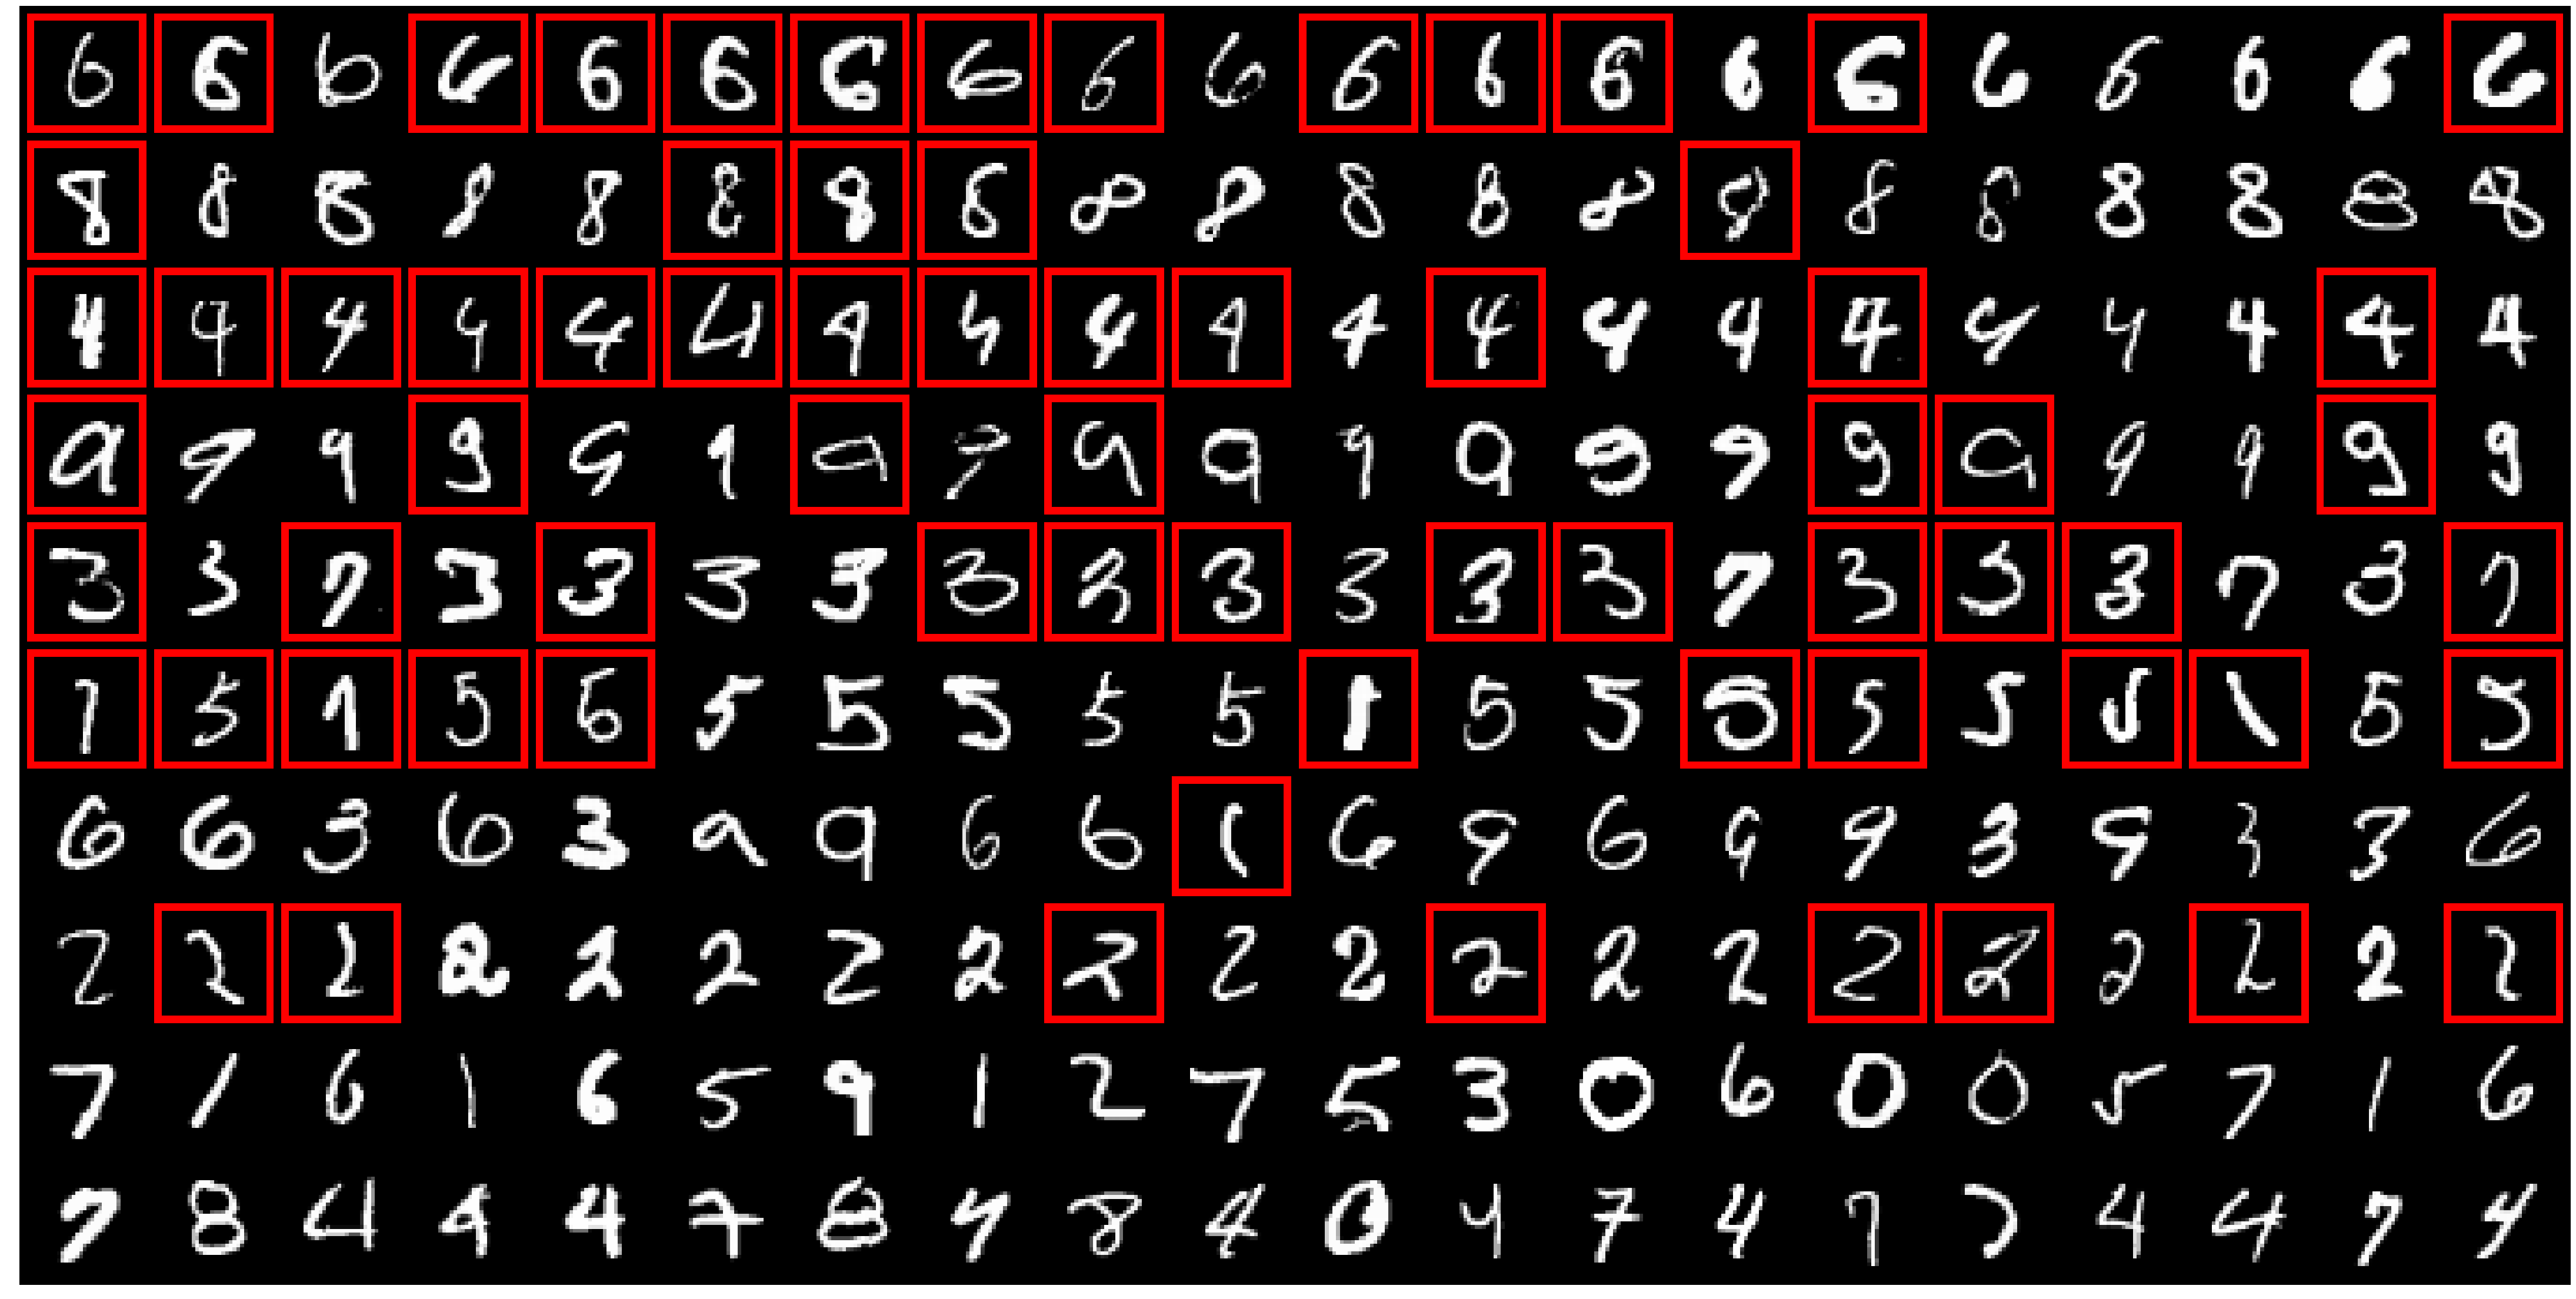

In [19]:
run_name='mlp,nclusters_10,layer_4'
plot_clusters(run_name)

* clustering inputs doesn't give interesting clusters with errors but digits go into separate clusters.
* clustering the just one layer gives interesting clusters.

# Conv

Train loss: 0.0414
Train accuracy: 98.75%

Cluster 0, size: 179
Cluster 0, normC: 0.27679333
Cluster 0, loss: 1.6561
Cluster 0, accuracy: 29.61%

Cluster 1, size: 134
Cluster 1, normC: 0.20322950
Cluster 1, loss: 1.9263
Cluster 1, accuracy: 32.84%

Cluster 2, size: 114
Cluster 2, normC: 0.17620440
Cluster 2, loss: 1.4001
Cluster 2, accuracy: 45.61%

Cluster 3, size: 404
Cluster 3, normC: 0.11974265
Cluster 3, loss: 1.0273
Cluster 3, accuracy: 60.64%

Cluster 4, size: 168
Cluster 4, normC: 0.18473494
Cluster 4, loss: 1.3773
Cluster 4, accuracy: 42.26%

Cluster 5, size: 159
Cluster 5, normC: 0.09916082
Cluster 5, loss: 1.0321
Cluster 5, accuracy: 60.38%

Cluster 6, size: 164
Cluster 6, normC: 0.19847655
Cluster 6, loss: 1.1379
Cluster 6, accuracy: 50.00%

Cluster 7, size: 298
Cluster 7, normC: 0.06412502
Cluster 7, loss: 0.6191
Cluster 7, accuracy: 81.54%

Cluster 8, size: 56402
Cluster 8, normC: 0.00028931
Cluster 8, loss: 0.0062
Cluster 8, accuracy: 99.99%

Cluster 9, size: 1978
Cluste

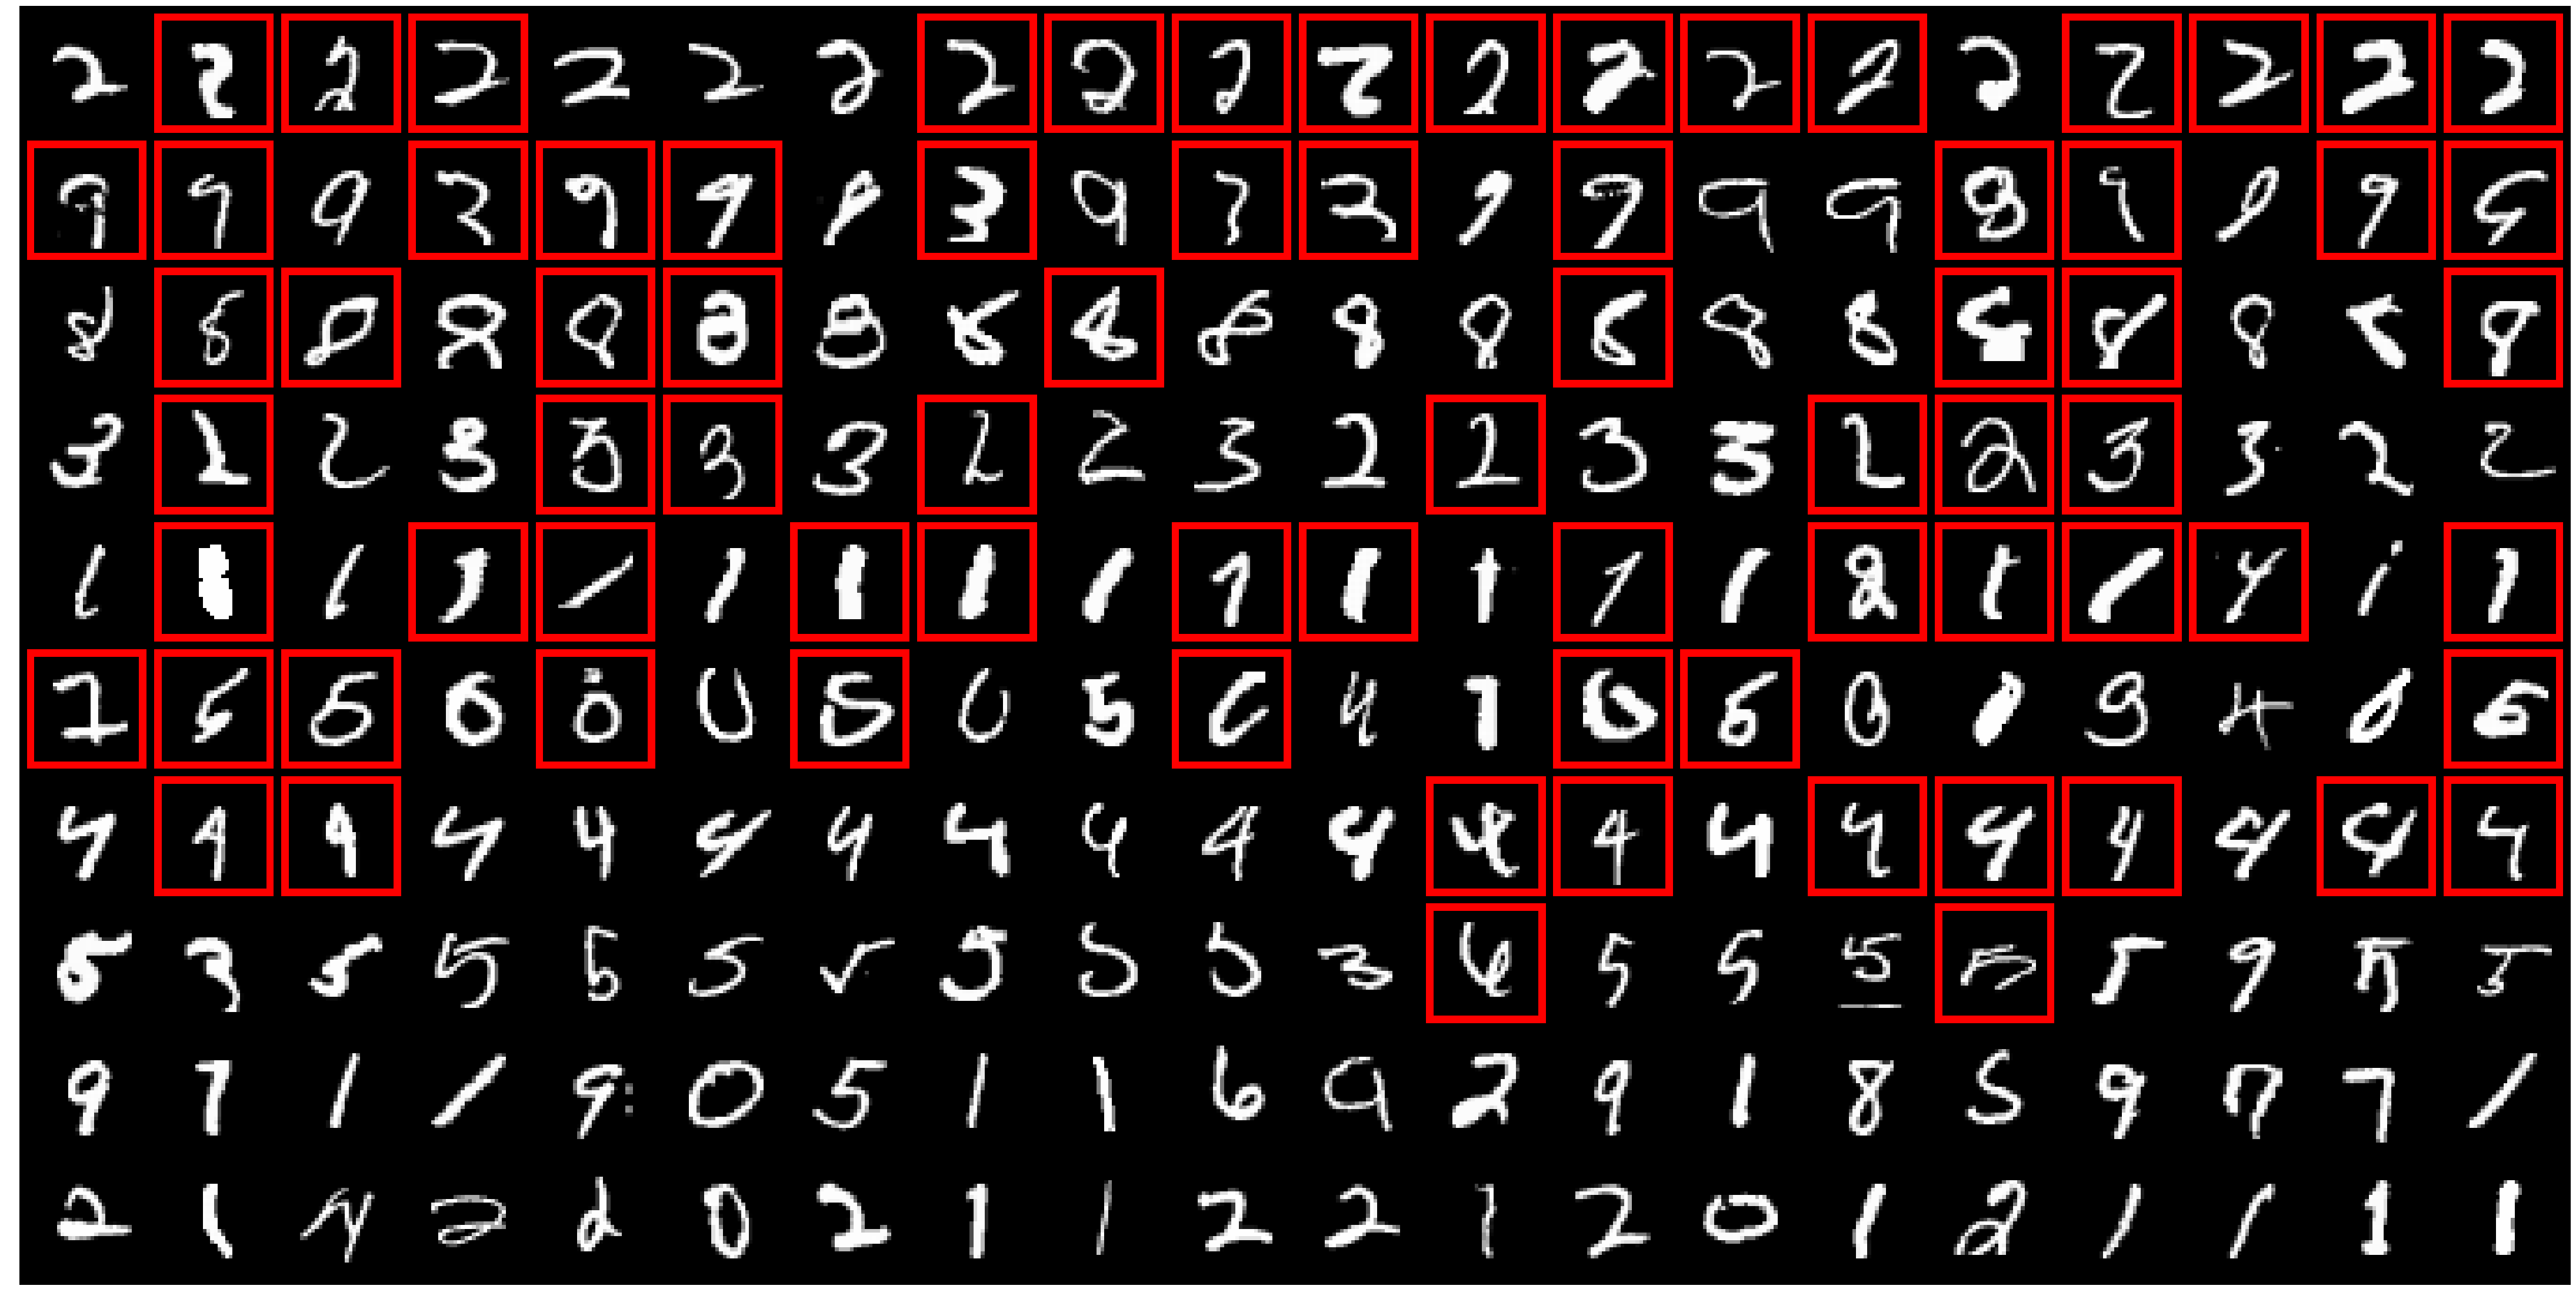

In [20]:
run_name='cnn,nclusters_10,citers_10'
plot_clusters(run_name)

# Conv online

Train loss: 0.0514
Train accuracy: 98.40%

Cluster 0, size: 514
Cluster 0, normC: 0.03548393
Cluster 0, loss: 0.5172
Cluster 0, accuracy: 87.55%

Cluster 1, size: 293
Cluster 1, normC: 0.10408836
Cluster 1, loss: 1.2191
Cluster 1, accuracy: 57.00%

Cluster 2, size: 161
Cluster 2, normC: 0.16694987
Cluster 2, loss: 1.4381
Cluster 2, accuracy: 37.27%

Cluster 3, size: 80
Cluster 3, normC: 0.18750268
Cluster 3, loss: 1.3813
Cluster 3, accuracy: 32.50%

Cluster 4, size: 189
Cluster 4, normC: 0.21643476
Cluster 4, loss: 1.9057
Cluster 4, accuracy: 22.75%

Cluster 5, size: 131
Cluster 5, normC: 0.19177258
Cluster 5, loss: 1.6109
Cluster 5, accuracy: 38.17%

Cluster 6, size: 97
Cluster 6, normC: 0.17519899
Cluster 6, loss: 1.5615
Cluster 6, accuracy: 40.21%

Cluster 7, size: 252
Cluster 7, normC: 0.14572567
Cluster 7, loss: 1.6828
Cluster 7, accuracy: 28.17%

Cluster 8, size: 129
Cluster 8, normC: 0.22755142
Cluster 8, loss: 1.9123
Cluster 8, accuracy: 24.03%

Cluster 9, size: 58154
Cluster 9

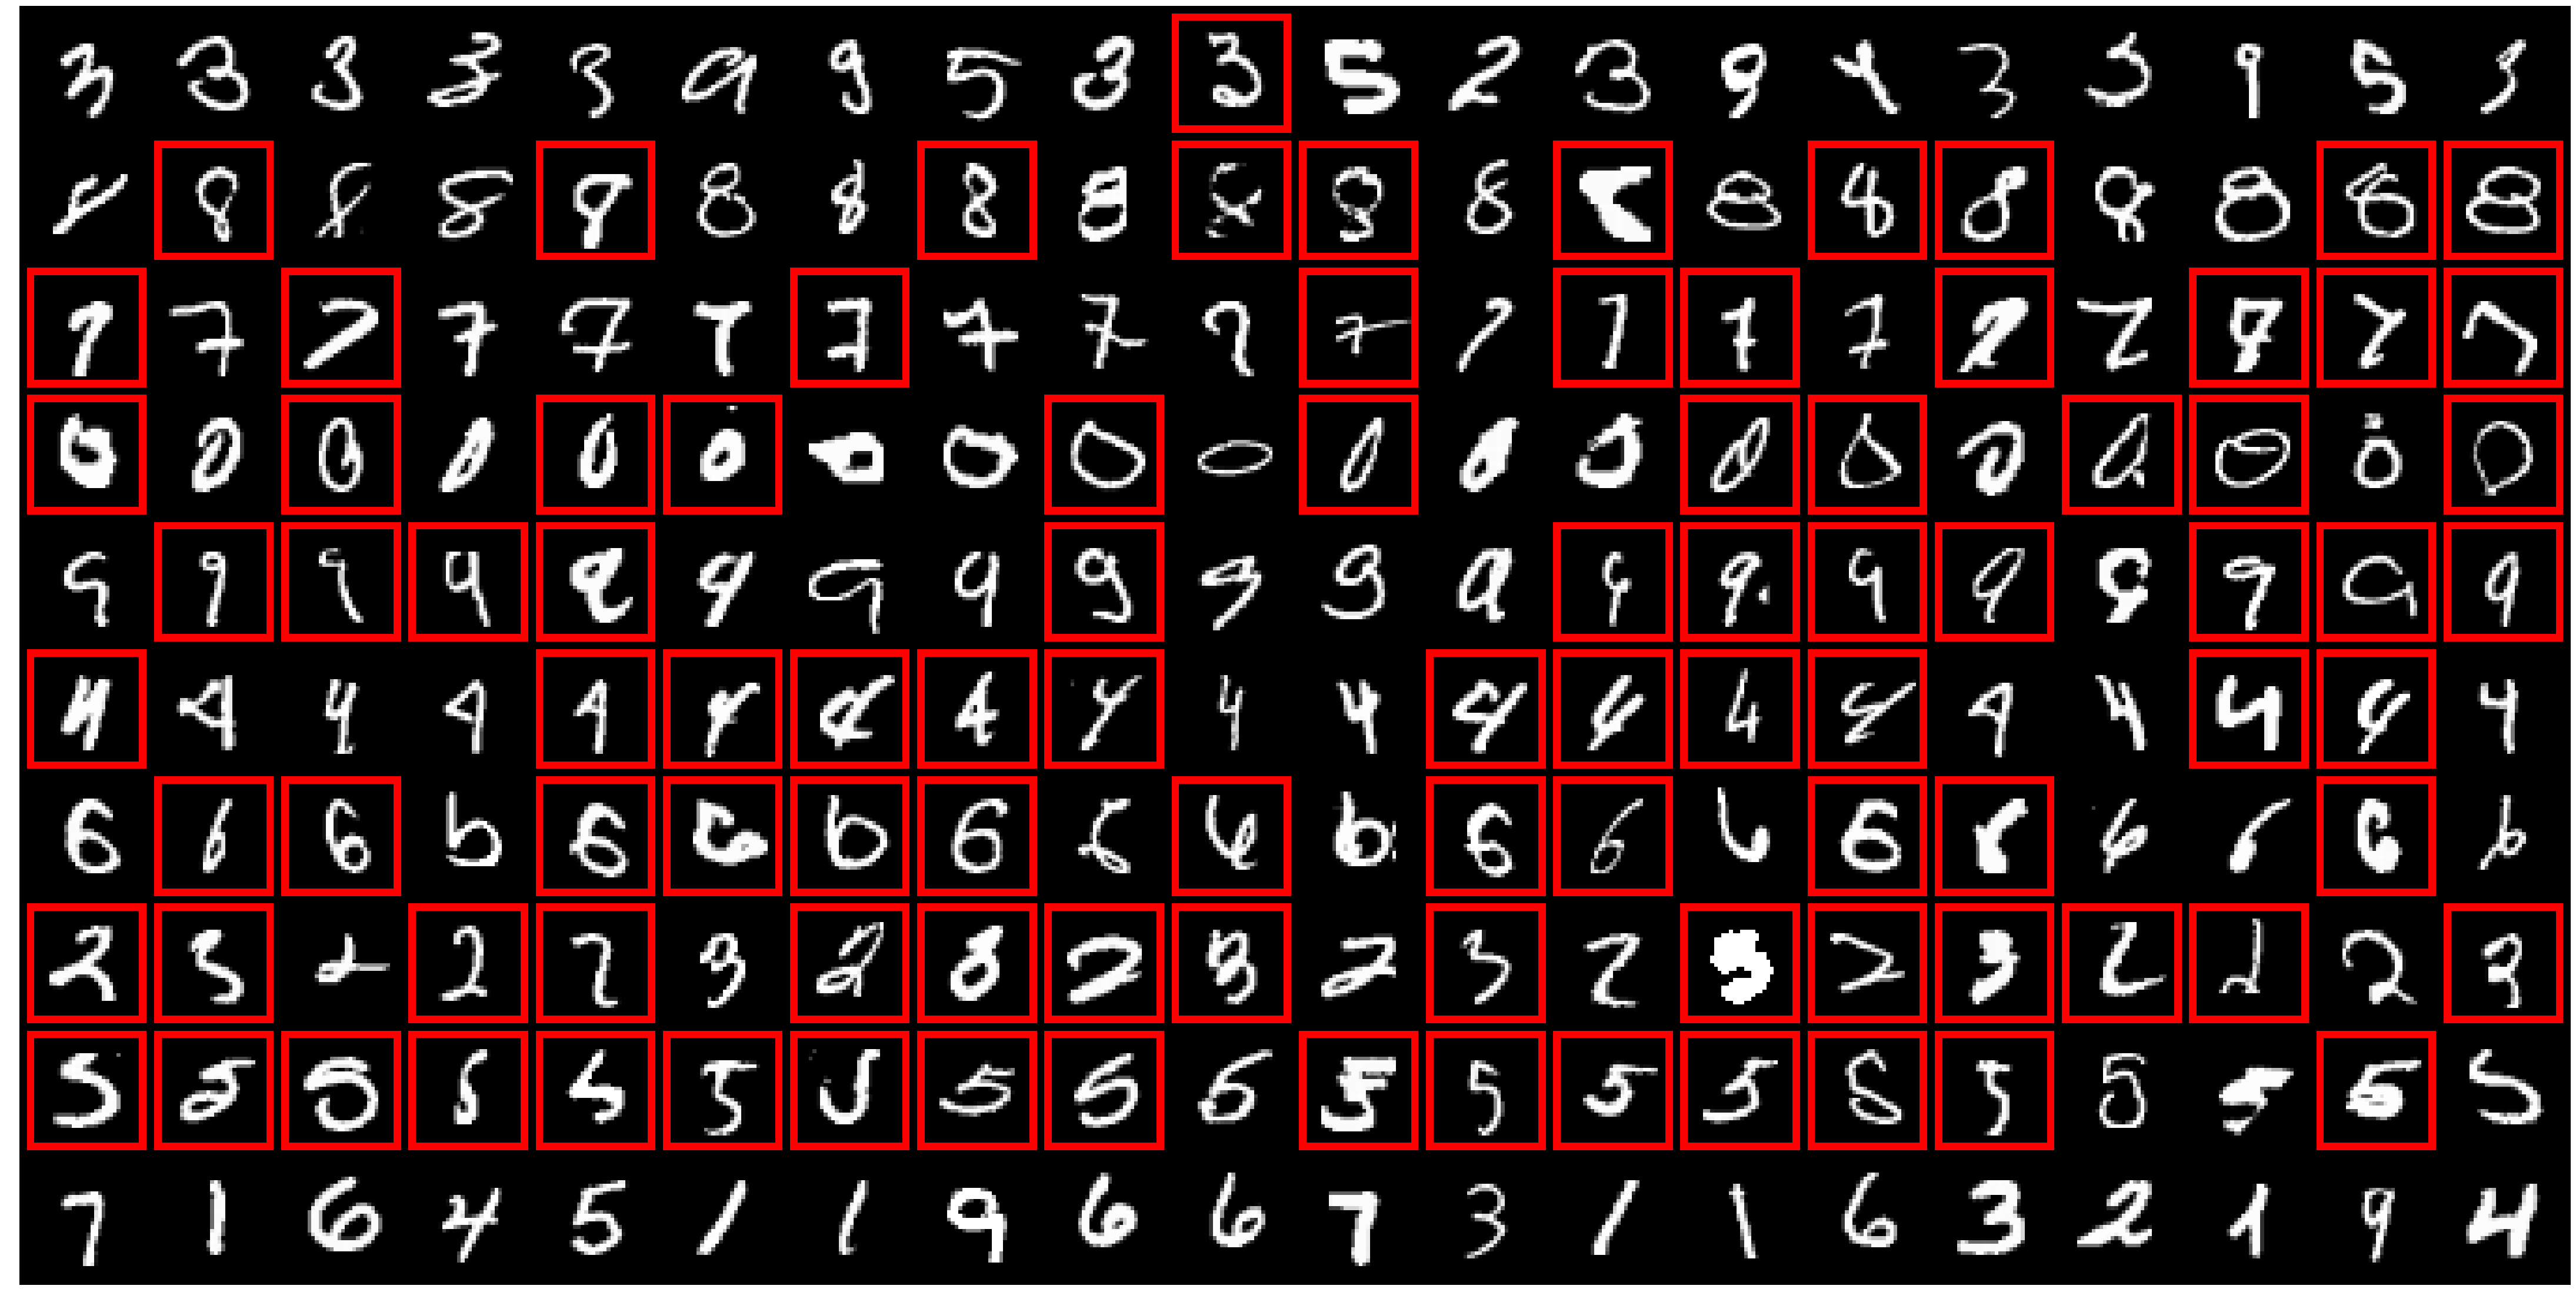

In [24]:
run_name='cnn,nclusters_10,online'
plot_clusters(run_name)

## time
* out of 5.5s for gluster update (2-3x slower than a single forward-backward)
    - 2.4s is forward and backward
    - 1.5s is save dists hooks
    - .7s is accum new centers
    - .4s is centers update
    - .2s is model copy

# dropout=True

Train loss: 0.1045
Train accuracy: 96.97%

Cluster 0, size: 1431
Cluster 0, normC: 0.02349157
Cluster 0, loss: 0.6890
Cluster 0, accuracy: 77.43%

Cluster 1, size: 417
Cluster 1, normC: 0.07892992
Cluster 1, loss: 1.3499
Cluster 1, accuracy: 46.28%

Cluster 2, size: 1034
Cluster 2, normC: 0.07736512
Cluster 2, loss: 1.0045
Cluster 2, accuracy: 61.90%

Cluster 3, size: 397
Cluster 3, normC: 0.10455298
Cluster 3, loss: 1.3415
Cluster 3, accuracy: 48.11%

Cluster 4, size: 631
Cluster 4, normC: 0.07412304
Cluster 4, loss: 0.9967
Cluster 4, accuracy: 66.88%

Cluster 5, size: 53653
Cluster 5, normC: 0.00109007
Cluster 5, loss: 0.0204
Cluster 5, accuracy: 99.95%

Cluster 6, size: 444
Cluster 6, normC: 0.11804465
Cluster 6, loss: 1.4159
Cluster 6, accuracy: 36.49%

Cluster 7, size: 205
Cluster 7, normC: 0.08840097
Cluster 7, loss: 1.2990
Cluster 7, accuracy: 59.02%

Cluster 8, size: 864
Cluster 8, normC: 0.03133880
Cluster 8, loss: 0.3561
Cluster 8, accuracy: 92.25%

Cluster 9, size: 924
Clust

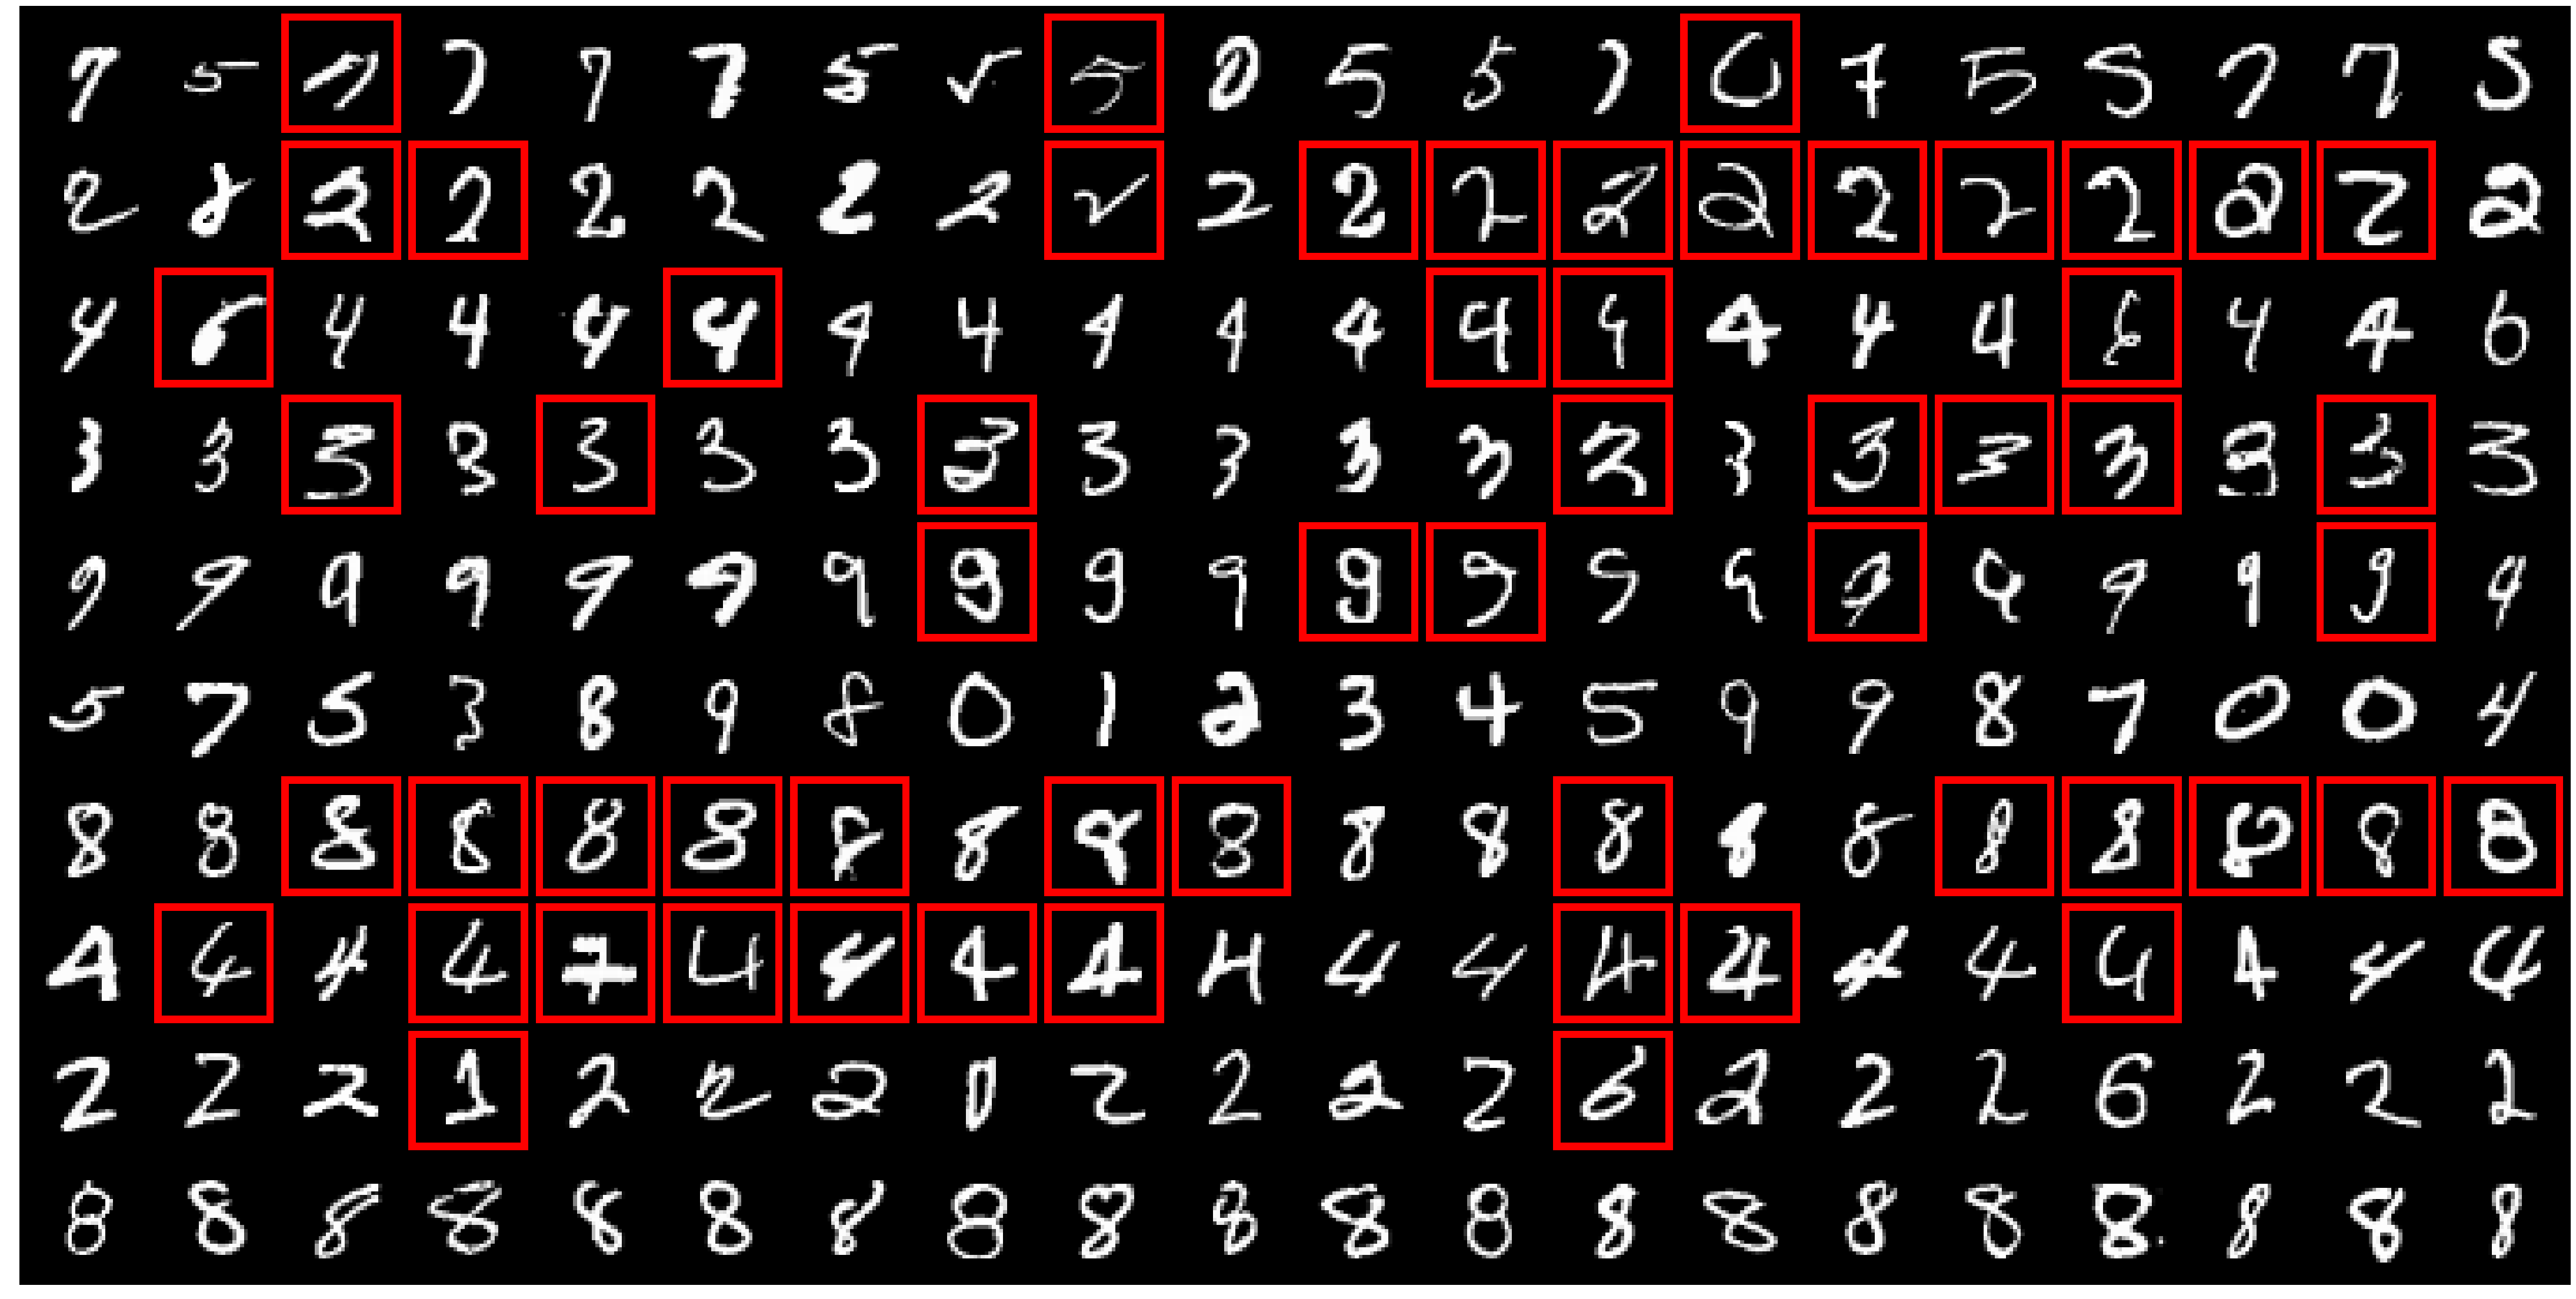

In [27]:
run_name='cnn,nclusters_10,online,delay_10'
plot_clusters(run_name)